### Table of Contents

1. Introduction
2. Businss Proposal
3. Data Acquisition and Wrangling
4. Exploratory Data Analysis and Inferential Statistics
5. Feature Engineering and Preprocessing
6. Modeling
7. Interpretability and Conclusions
8. Further Work and Future Implementation
9. Sources

***
## 1. Introduction

In August of 2018, Elon Musk, CEO of the electric car company Telsa, sent out the tweet "Am considering taking Telsa private at \\$420. Funding secured." The result of this tweet was a $40M fine, Musk losing his chair at Telsa, and an 11% increase of Tesla's stock price at the day's close [1].

In spite of his censurship, Musk continued send out tweets that directly impacted his own company's stocks. And in 2020, Telsa's stock fell sharply by 10.8% at the close when Musk tweeted "Telsa stock price is too high imo" [2]. Investors that have, in the past, carefully done their due diligence in deciding how to allocate their funds are now faced with this new element in how stocks perform: that of social media. Highly influential individuals can, and have, voiced their opinions on the market through various social media platforms, causing prices to rise or fall within hours of publication, and many have claimed this to be outright market manipulation, calling for regulators to get involved. Nonetheless, today's investing strategies now have to rely on closely monitoring social media to alert them for these instances. The rapid market changes from these tweets has caused investors to be fixated on monitoring social media for similar occurrences. 

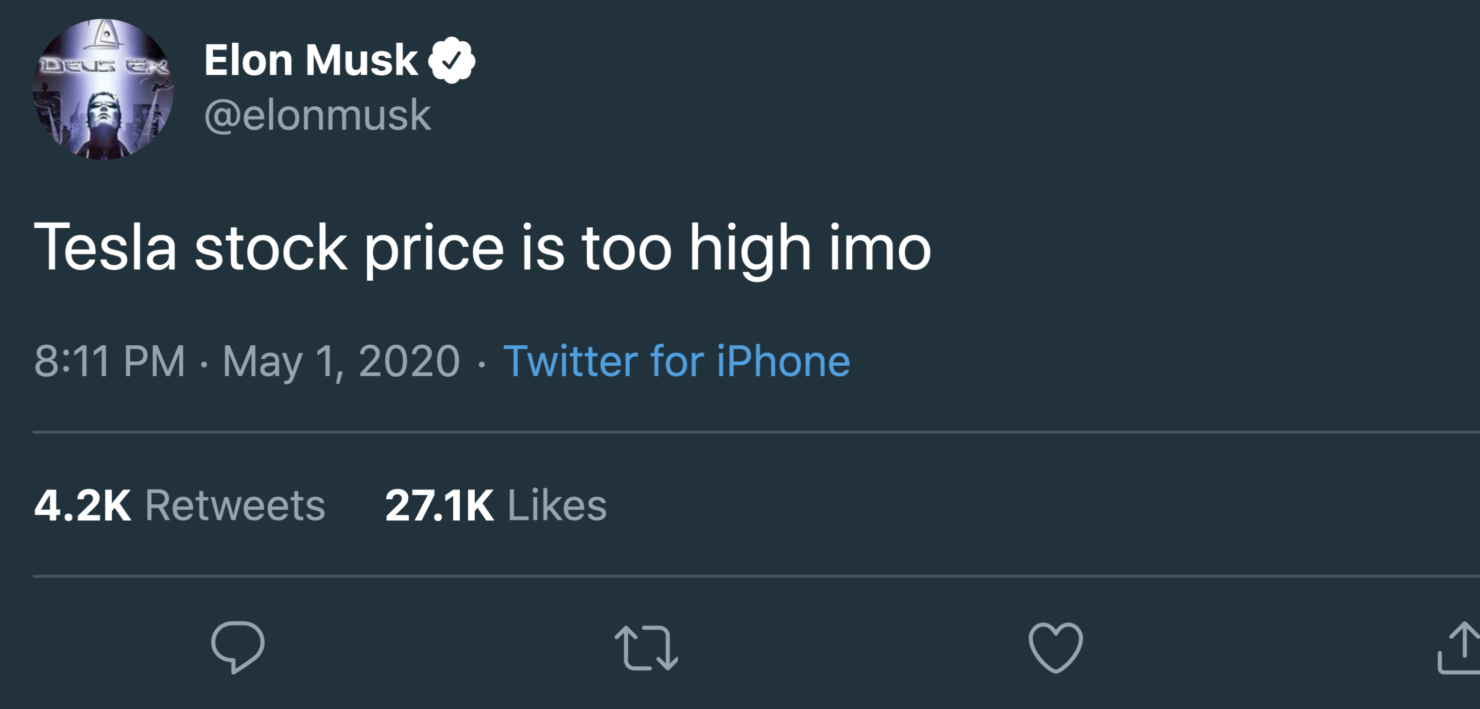

__Figure 1:__   
>Elon Musk's 2020 tweet that dropped stop prices by 10.8%

***
## 2. Business Proposal

The accessibility and ubiquity of social media has created a new problem for investors, in which influential individuals can cause dramatic changes in the market. On the other hand, it creates a potentially new and much faster means of assessing stock movements. For example, on January 28th, shares for the CD Projekt developers of Cyberpunk 2077 surged over 12% after Elon Musk tweeted that he liked the game the night before.

Having been able to recognize that a stock change would follow this tweet would have an enormous impact on investment strategies.  
Andy Swan writes in Forbes that there are 4 types of tweets to look for that influence stocks.

 - Influential people or groups tweets about a company’s stock
 - Company tweets about its own stock or by influential investors
 - Policy events that are tweeted by government insiders or observers
 - Influencer tweets an opinion about a particular brand or product

Given these four tweet types, we will assess executives' twitter feeds to look for changes of their companies' stocks.


***
## 3. Data Acquisition and Wrangling



This capstone collected tweets over a 5-year period of the CEOs of several companies. The main reason for this due to the limitations of yfinance's max history allowed when accessing stock data. Twitter data were scraped via twint using these restrictions, including the following criteria:
- Each executive's stock must be public
- Executives tweet at least 1000 times over the 5 year period
- They don't need to be currently at the company, so long as they were affiliated with the company in some capacity over the length of collected tweets

Their respective stocks are collected and the tweets are analyzed to determine if the closing price of a stock can be determined from the CEO's tweets. The CEOs, their twitter username, and their associated stocks are as follows:  

 - Elon Musk : '@elonmusk': Tesla (TSLA)
 - Aaron Levie : '@levie': Box (BOX)
 - Jack Dorsey : '@jack': Twitter (TWTR)
 - Marc Benioff : '@Benioff': Salesforce (CRM)
 - Richard Branson: @richardbranson: Virgin Galactic (SPCE)
 - John Legere: @JohnLegere: T-Mobile (TMUS)

Overall, the following tweets were collected using twint*

 + 1660 Tweets from @elonmusk.
 + 1737 Tweets from @levie.
 + 5128 Tweets from @jack.
 + 4858 Tweets from @Benioff.
 + 7723 Tweets from @richardbranson.
 + 37249 Tweets from @JohnLegere.

The stock data were collected using yfinance to get the opening and closing prices of each executive's stocks over a maximum period of 5 years.*
 
Each stock that was collected has 1,259 entries pertaining to each stock date's open and closing prices, with the starting date on July 25th, 2016 with the exception of Virgin Galactic, which has 960 entries due to its starting date occuring september 29th, 2017. Each stock row has an opening, high, low, closing, volume, dividends, and stock splits entry. 

\* *At this time, twint is unable to scrape data further back than 2-weeks, so data used for this notebook are from the last saved twint scrape. To prevent reduction of data due to shortening common dates, yfinance data was also loaded from the last saved yfinance scrape.*


## Data Wrangling

Our goal is to predict stock changes based off twitter data that occurs before the next opening or closing price. To get the data into a workable format the opening and closing stock prices were sorted by date and time and combined into a single dataframe. Missing prices (holidays, weekends, etc...) were filled via mean imputation on the organized stocks, and the opening/closing percent changes of the stock prices were calculated.

Fig 2(a) TSLA Price filled via Mean Imputation |Fig 2(b) Detrended TSLA Price Percent Change  
- | -
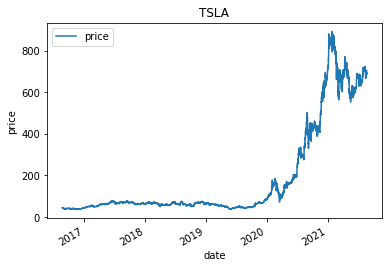|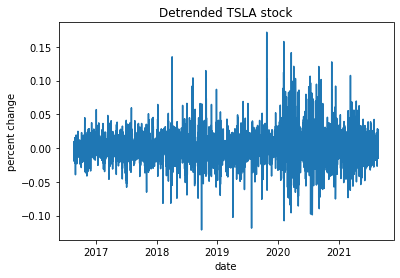

__Figure 2(a):__   
>An example of colleted stock opening and closing prices with missing values (dates the market wasn't open) filled in with mean imputation.  

__Figure 2(b):__  
>The same stock detrended by calculating the percent change from the current price to the next price point.

The tweets were scraped using twint over a maximum period since their stock went public. In total, there were 37 features for each scraped tweet from which we selected the following 14 to analyze.

     Feature Name                             Description
     -----------------------------------------------------
    'date'                           date tweet was posted
    'time'                     time (EST) tweet was posted
    'username'                      posters twitter handle
    'tweet'                raw tweet data in string format
    'mentions'         list of mentions (@) from raw tweet
    'hashtags'         list of hashtags (#) from raw tweet
    'cashtags'         list of cashtags ($) from raw tweet
    'video'                            list of video links
    'photos'                           list of photo links
    'urls'                              list of hyperlinks
    'thumbnail'                    list of thumbnail links
    'replies_count'       number of replies post receieved
    'retweets_count'      number of retweets post received
    'likes_count'            number of likes post received 

Missing values were scraped as empty lists, and were converted to 0s for easier processing. Languages other than english and unclassified were removed and urls, photos, thumbnails, mentions, and hashtags were converted to counts. 

Tweets that occured between opening and closing dates were grouped together into a single row and their respective features were summed.   
      
 + 2179 Tweet-Days from @elonmusk.
 + 957 Tweet-Days from @levie.
 + 1476 Tweet-Days from @jack.
 + 1868 Tweet-Days from @Benioff.
 + 2009 Tweet-Days from @richardbranson.
 + 3415 Tweet-Days from @JohnLegere.
  
Finally, the combined tweets dataframes and associated stocks were merged together by date and time. Any missing values from non-overlapping dates were removed.

***
## 4. Exploratory Data Analysis and Inferential Statistics

Initial explorations showed that the thumbnails feature was a duplicate of the photos feature, so the thumbnails feature was removed because photos is easier for me to type than thumnbails.

Feature are subdivided into three categories:

**Time-Sensitive**  
*These features will change depending on how much time has passed since the initial post*

- Replies Counts   
- Likes Counts  
- Retweets Counts  

**Media**  
*These features are links to additional media apart from the tweet itself*

- Photos
- Videos
- Urls

**Tags**  
*These features are counts of the number of times a tag was used inside of a tweet*

- Mentions
- Hashtags
- Cashtags

These features were further explored by grouping the dataframe by username.

| username       |   mentions |   hashtags |   cashtags |   video |   photos |   urls |    replies_count |   retweets_count |   likes_count |   number of tweets |    price |   percent change |
|:---------------|-----------:|-----------:|-----------:|--------:|---------:|-------:|-----------------:|-----------------:|--------------:|-------------------:|---------:|-----------------:|
| Benioff        |       3837 |        362 |          0 |    1999 |     2339 |   2696 |  63794           | 384674           |   1.66148e+06 |               4729 | 267300   |         0.845123 |
| JohnLegere     |      10125 |      12154 |        231 |    9840 |    10294 |   7301 | 607419           | 760187           |   4.03523e+06 |              36437 | 262775   |         1.01267  |
| elonmusk       |        286 |         19 |          0 |     667 |      653 |    776 |      1.09626e+07 |      2.87978e+07 |   2.88713e+08 |              11182 | 433582   |         4.36966  |
| jack           |        932 |        414 |          6 |     463 |      543 |   1095 | 792240           |      1.69175e+06 |   7.24301e+06 |               4962 |  45434.3 |         1.67916  |
| levie          |         99 |         11 |          2 |     145 |      144 |    164 |  40258           | 204086           |   1.47645e+06 |               1704 |  17607.4 |         0.943642 |
| richardbranson |       4779 |       3179 |          0 |    5933 |     5549 |   6352 | 247238           | 588694           |   3.06961e+06 |               7700 |  27742.9 |         0.792197 |

__Table 1:__  
>Sum of twitter features grouped by username

| username       |   mentions |   hashtags |   cashtags |    video |   photos |     urls |   replies_count |   retweets_count |   likes_count |   number of tweets |    price |   percent change |
|:---------------|-----------:|-----------:|-----------:|---------:|---------:|---------:|----------------:|-----------------:|--------------:|-------------------:|---------:|-----------------:|
| Benioff        |   2.08987  | 0.197168   | 0          | 1.08878  | 1.27397  | 1.46841  |         34.7462 |          209.517 |       904.946 |            2.57571 | 145.588  |      0.000460307 |
| JohnLegere     |   3.02149  | 3.62698    | 0.0689346  | 2.93644  | 3.07192  | 2.17875  |        181.265  |          226.854 |      1204.19  |           10.8735  |  78.4168 |      0.000302198 |
| elonmusk       |   0.132592 | 0.00880853 | 0          | 0.309226 | 0.302735 | 0.359759 |       5082.33   |        13350.8   |    133849     |            5.18405 | 201.012  |      0.0020258   |
| jack           |   0.646325 | 0.287101   | 0.00416089 | 0.321082 | 0.37656  | 0.759362 |        549.404  |         1173.19  |      5022.89  |            3.44105 |  31.5078 |      0.00116447  |
| levie          |   0.104984 | 0.0116649  | 0.00212089 | 0.153765 | 0.152704 | 0.173913 |         42.6914 |          216.422 |      1565.7   |            1.807   |  18.6717 |      0.00100068  |
| richardbranson |   2.3788   | 1.58238    | 0          | 2.95321  | 2.76207  | 3.16177  |        123.065  |          293.028 |      1527.93  |            3.83275 |  13.8093 |      0.000394324 |

__Table 2:__   
>Mean of twitter features grouped by username

| username       |   mentions |   hashtags |   cashtags |    video |   photos |     urls |   replies_count |   retweets_count |   likes_count |   number of tweets |     price |   percent change |
|:---------------|-----------:|-----------:|-----------:|---------:|---------:|---------:|----------------:|-----------------:|--------------:|-------------------:|----------:|-----------------:|
| Benioff        |   2.79335  |   0.578745 |  0         | 1.27104  | 1.87994  | 1.61552  |         63.8039 |          388.356 |       1529.98 |            2.33309 |  51.7178  |        0.0142925 |
| JohnLegere     |   3.90027  |   3.98189  |  0.668497  | 2.98101  | 3.23081  | 2.22991  |        448.613  |          982.474 |       1931.22 |            9.1876  |  25.151   |        0.0113919 |
| elonmusk       |   0.482571 |   0.134207 |  0         | 0.661261 | 0.704911 | 0.735663 |      12495.5    |        30914.4   |     253784    |            5.30428 | 234.899   |        0.0258205 |
| jack           |   2.09385  |   1.26369  |  0.0743934 | 0.768182 | 1.05719  | 1.15234  |       3033.75   |         8060.15  |      28776.1  |            7.38255 |  12.4814  |        0.022442  |
| levie          |   0.386347 |   0.107429 |  0.0460287 | 0.399979 | 0.463086 | 0.395675 |         71.4368 |          442.132 |       2667.34 |            1.60178 |   3.12295 |        0.0212546 |
| richardbranson |   2.28549  |   2.08349  |  0         | 2.03378  | 1.92621  | 1.93732  |        288.597  |          873.961 |       5041.76 |            2.6671  |   9.08202 |        0.0253507 |

__Table 3:__   
>Std of twitter features grouped by username

As seen in tables __1__ and __2__, TMobile's John Legere has the most tweets and also averages the most (averaging __10.8__ tweets per day in comparison to __1.8__ tweets per day from Aaron Levie of BOX).

John Legere also has the largest number of features associated with the tweets, and average the most for tags and photos. CEO of Virgin Galactic, Richard Branson tweets less frequently (averaging __3.8__ tweets/day) but has the most frequent media feature usage (most for videos and urls in his tweets and close to John Legere for average photos posted).

Elon Musk is very popular, averaging __133,849__ likes per tweet. Second to him is Twitter's Jack Dorsey with an average of __5,022.89__ likes per tweet, which is a huge difference. As musks tweets were the ones that garned recent media attention, the time-sensitive features will be important in evaluating model to see how impactful they are to the stock price percent change. Ultimately we want to do away with these features as they will change over time, and ultimately want to determine if the stock price change can be predicted as soon as the tweet is posted. Musk does not, however, seem to be a big fan of media features, as he can be seen in table __2__ having low averages for them.

Elon Musk had the highest net percent change __436.97%__ and Richard Branson had the least of __79.22%__, however both have the highest standard deviations in percent change: Elon Musk $+/-$ __2.58%__, and Richard Branson $+/-$ __2.53%__. 



Choose 3-10 charts from your analysis to put in data storytelling doc, and write brief explanation of why they are meaningful make sure to include titles and axis titles (with units) for each chart you’ll probably want to lead with the univariate chart of the target, general rule is go high level to specific

Here we examine several business leaders / investors corresponding to different stock prices. For example, Tweets from Elon Musk is examined for impact against Tesla stock price changes. 

Note this model can be flexible to examine the relationship between any business leader and the corresponding stock value. Here we selected six study cases, since we expect each case to have unique characteristics or relationships. We also want to examine the combined impact on all six stock - think of it as a small portfolio. Although at this stage, the code and model was designed to analysis the impact of sentiment based on these six companies, it can be made flexible enough to support any companies or a mix of companies to construct a portfolio. 

The table below shows the number of data points associated with each of the six study cases. From the data count, we can identify that certain features with small data count, such as hastags for Levie, may not yield reliable test results. This will be useful in the later stage when we infer information from statistical testing.

#### Visual Data Exploration

Here, the price percent change distributions are examined. With special attention to Elon Musk and Richard Branson.

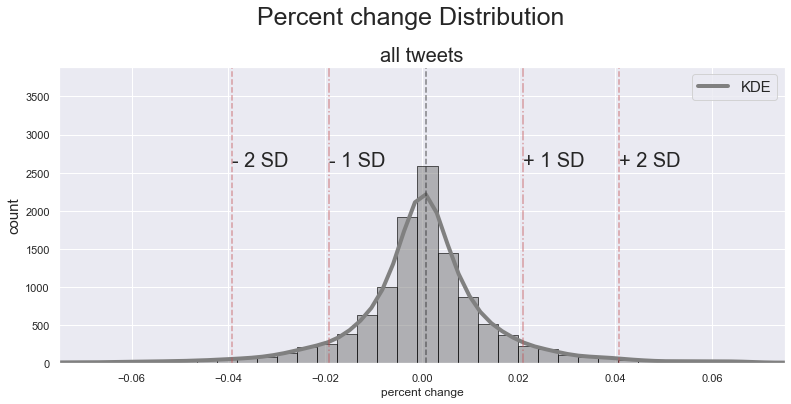
__Figure 3:__  
>Distribution of Percent Price Change of all Tweets, with $+/-$ 1 and $+/-$2 standard deviations from the mean (dashed grey line) as indicated by the dashed red lines. A kernal denisty estimate is plotted over the histogram.

Fig 4(a)  | Fig 4(b)
- | - 
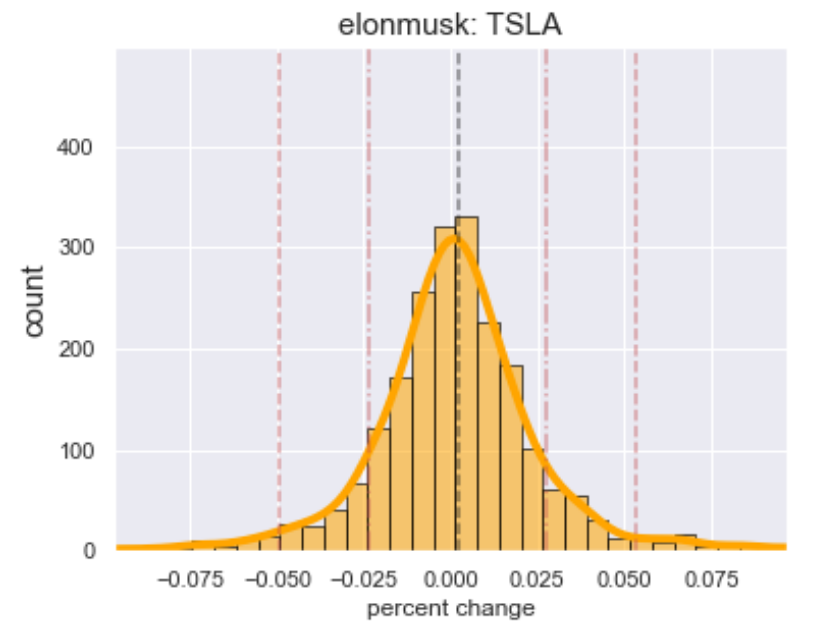|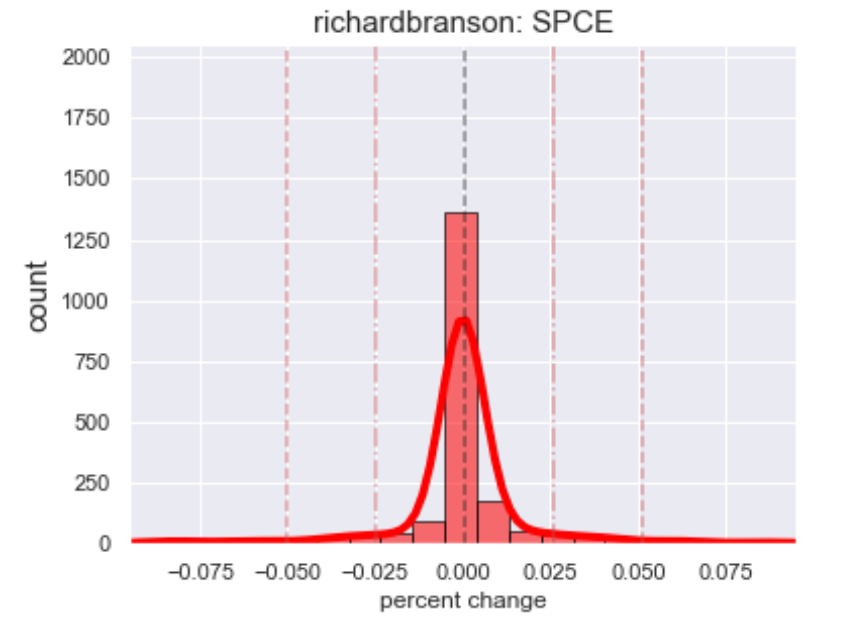

__Figure 4(a):__   
>Elon Musk Distribution of Percent Price Change in Yellow

__Figure 4(b):__   
>Richard Branson Distribution of Percent Price Change in Red

There is a sizeable difference in the distribution of percent changes for Elon Musk vs Richard Branson. What is concerning here is that there will not be enough data in the upper and lower areas to be able to make accurate predictions. To ensure that we can encompass enough data, the cutoff as to whether or not a stock changes is one standard deviation from the mean for each stock. 

#### Important Features #####
We used a random forest classifier to determine which features were most important to the overall dataset.

Important Features (with time-sensitive features):

           retweets_count 0.156 +/- 0.001
              likes_count 0.153 +/- 0.001
            replies_count 0.152 +/- 0.001
         number of tweets 0.116 +/- 0.001
                     urls 0.100 +/- 0.002
                   photos 0.098 +/- 0.002
                    video 0.094 +/- 0.002
                 mentions 0.085 +/- 0.001
                 hashtags 0.074 +/- 0.001
                 cashtags 0.002 +/- 0.000
                 
Important Features (without time-sensitive features):

         number of tweets 0.065 +/- 0.001
                 mentions 0.059 +/- 0.001
                   photos 0.059 +/- 0.001
                     urls 0.058 +/- 0.001
                 hashtags 0.054 +/- 0.001
                    video 0.053 +/- 0.001
                 cashtags 0.002 +/- 0.000

The time-sensitive features; retweets, likes, and replies counts, are the top three most important features, followed by number of tweets. This sweems to make sense as the more popular someone is, the more media attention they receive, and the more likely they are to affect the stock price. The more a person tweets, the more likely something posted will cause a change to occur.
    
The media-link features; urls, photos, and videos are second-highest when included with the time-sentive features. When time-sensitive features are excluded, number of tweets is highest, followed by a mix of tag and media features. In both cases cashtags are last, likely due to the disparity of data for that feature.

#### T-Test Scores and Statistical Significance per Executive

|    | elonmusk         |       score |       p_val | levie            |      score |    p_val | jack             |     score |     p_val | Benioff          |      score |         p_val | richardbranson   |     score |         p_val | JohnLegere       |      score |       p_val |
|---:|:-----------------|------------:|------------:|:-----------------|-----------:|---------:|:-----------------|----------:|----------:|:-----------------|-----------:|--------------:|:-----------------|----------:|--------------:|:-----------------|-----------:|------------:|
|  0 | mentions         |   0.617013  |   0.537291  | mentions         |  0.385021  | 0.700309 | mentions         |  0.929142 | 0.352971  | mentions         |  -1.33063  |   0.183477    | mentions         |   3.06753 |   0.0021872   | mentions         |  1.88355   | 0.0597122   |
|  1 | hashtags         |  -0.871199  |   0.383743  | hashtags         | -1.47883   | 0.139521 | hashtags         |  0.405791 | 0.684956  | hashtags         |   0.924808 |   0.355188    | hashtags         |   4.6613  |   3.34884e-06 | hashtags         |  3.65635   | 0.000259768 |
|  2 | cashtags         | nan         | nan         | cashtags         |  0.684704  | 0.493699 | cashtags         | -0.985369 | 0.324608  | cashtags         | nan        | nan           | cashtags         | nan       | nan           | cashtags         | -3.04115   | 0.00237498  |
|  3 | video            |  -0.714334  |   0.475098  | video            |  0.316215  | 0.751909 | video            |  1.50067  | 0.13366   | video            |  -1.68023  |   0.093082    | video            |  12.6579  |   2.19007e-35 | video            |  4.3737    | 1.2588e-05  |
|  4 | photos           |  -0.732337  |   0.464043  | photos           |  0.0598674 | 0.952274 | photos           |  1.35938  | 0.17424   | photos           |  -1.77444  |   0.0761566   | photos           |  13.9623  |   2.36842e-42 | photos           |  4.94613   | 7.94304e-07 |
|  5 | urls             |   2.05559   |   0.0399425 | urls             |  0.656777  | 0.511485 | urls             | -0.205045 | 0.837566  | urls             |  -2.13725  |   0.0327099   | urls             |  13.381   |   3.53631e-39 | urls             | -2.22176   | 0.0263662   |
|  6 | replies_count    |  -0.0661824 |   0.947239  | replies_count    |  0.208852  | 0.834609 | replies_count    | -1.7932   | 0.0731508 | replies_count    |  -2.96643  |   0.00305171  | replies_count    |  -3.55781 |   0.000382643 | replies_count    |  0.0878905 | 0.929969    |
|  7 | retweets_count   |   1.06854   |   0.285399  | retweets_count   |  1.17663   | 0.239641 | retweets_count   | -0.809602 | 0.418303  | retweets_count   |  -2.35927  |   0.0184154   | retweets_count   |  -1.95644 |   0.0505518   | retweets_count   | -1.88423   | 0.0596211   |
|  8 | likes_count      |  -0.276312  |   0.782335  | likes_count      |  1.03573   | 0.300594 | likes_count      | -1.17251  | 0.241187  | likes_count      |  -4.21151  |   2.65964e-05 | likes_count      |  -3.86991 |   0.000112351 | likes_count      | -0.993379  | 0.320597    |
|  9 | number of tweets |  -0.355546  |   0.722216  | number of tweets | -0.650271  | 0.515676 | number of tweets |  1.90965  | 0.0563763 | number of tweets |  -2.79375  |   0.00526419  | number of tweets |   9.45199 |   8.9228e-21  | number of tweets |  4.27635   | 1.95284e-05 |

__Table 4:__  
>T-Test Scores and P values for Feature Differences in Stocks Change vs No Stocks Change 

There is a large difference the T-Test scores between users of the same features. For example, Richard Branson's media features infer that they are ~13x more likely to indicate a stock movement, whereas Elon Musk's are between -0.7 -> 2 times as likely. 

Only allowing for scores that that have a p value <= 5% shows another large discrepancy. Take Elon Musk's statistically sificant feature(s):

|    | elonmusk   |   score |     p_val |
|---:|:-----------|--------:|----------:|
|  5 | urls       | 2.05559 | 0.0399425 |

__Table 5:__  
>Statistically Significant T-Test Scores for Elon Musk (P values <= 5.00%)

And compare that to Richard Branson's:

|    | richardbranson   |    score |       p_val |
|---:|:-----------------|---------:|------------:|
|  4 | photos           | 13.9623  | 2.36842e-42 |
|  5 | urls             | 13.381   | 3.53631e-39 |
|  3 | video            | 12.6579  | 2.19007e-35 |
|  9 | number of tweets |  9.45199 | 8.9228e-21  |
|  1 | hashtags         |  4.6613  | 3.34884e-06 |
|  0 | mentions         |  3.06753 | 0.0021872   |
|  6 | replies_count    | -3.55781 | 0.000382643 |
|  8 | likes_count      | -3.86991 | 0.000112351 |

__Table 6:__   
>Statistically Significant T-Test Scores for Richard Branson (P values <= 5.00%)

To further examine these relationships the distributions, box-plots, and kernal density estimations bewtween stock changes plotted. The replies count was picked as it was one of the most important time-sensitive features that was also statistically significant .

Fig 5(a) | Fig 5(b)
- | -
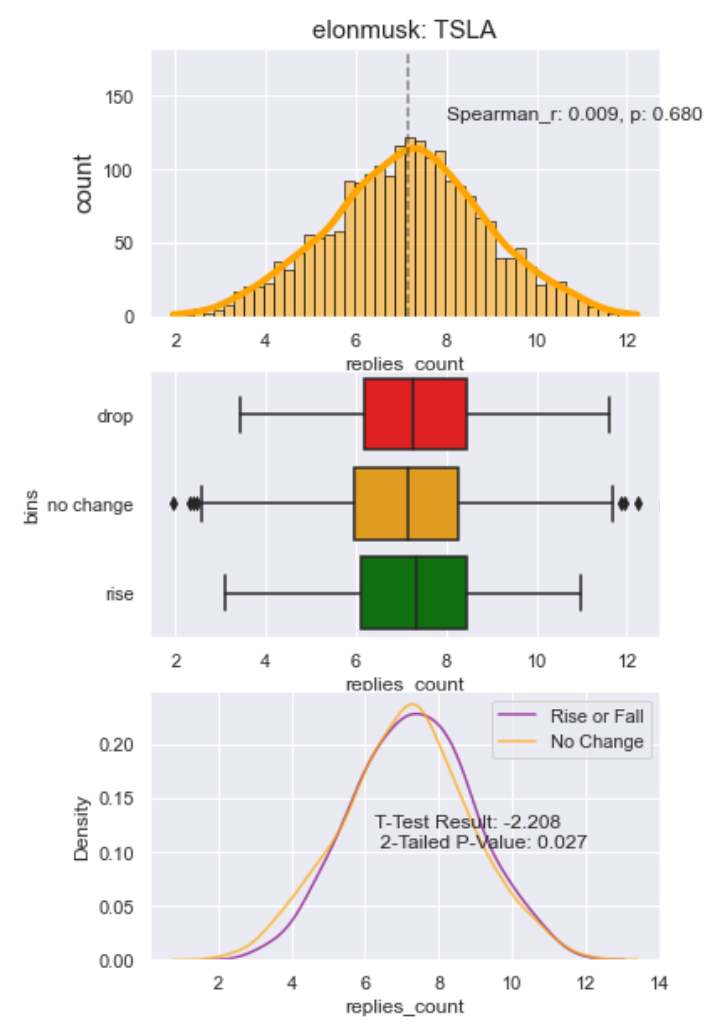|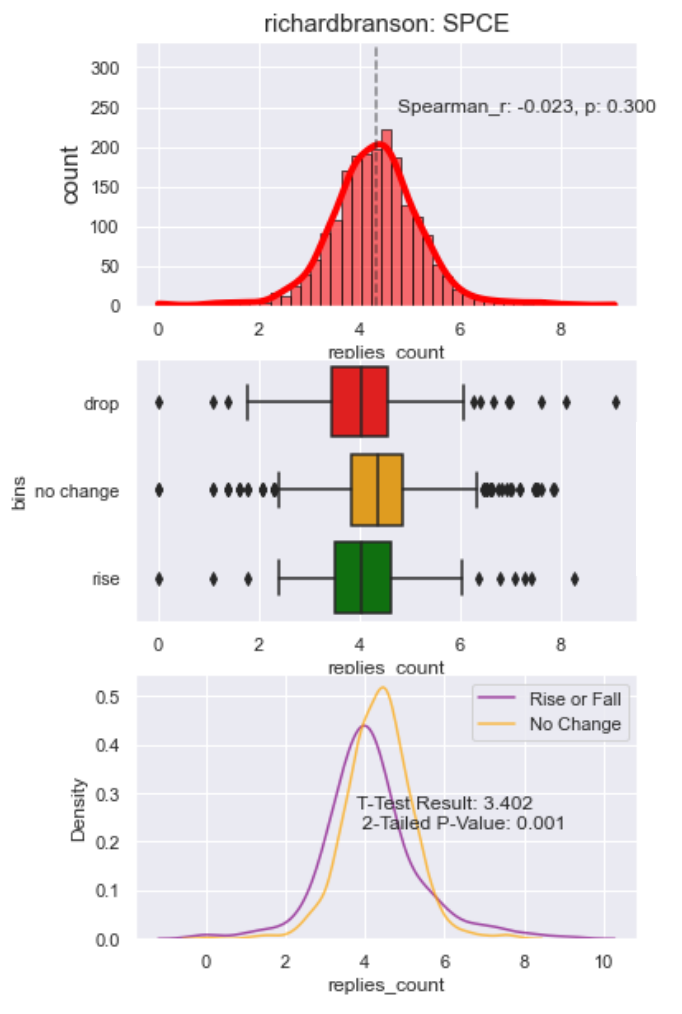

__Figure 5(a):__     
>Elon Musk Distribution (in Yellow), Box-Plot, and KDE for Replies Count, Pearson R, T-Test Score, and associated P values are annotated on the plots

__Figure 5(b):__    
>Richard Branson Distribution (in Red), Box-Plot, and KDE for Replies Count, Pearson R, T-Test Score, and associated P values are annotated on the plots

From the box plots, we can see that there are some slight differences between the stocks that don't change, vs those that do. The KDE plots reflect this visually with the changing stocks in purple vs no change in yellow. The Pearson Correlation Coefficient for both Elon Musk and Richard Branson's reply counts are not stastically significant to see an indication in correlating them to stock price. 

The KDE plots shows that there are slight differences between the stocks that change and don't change for both users, though the signs are flipped. They are also both statistically significant, and it's much easier to see the differences in these plots.

**The p-value in the elon musk t-test shows it as being statistically significant when it didn't show up in the prior plot. I will rerun this to check.**

Fig 6(a) Elon Musk Replies Count Against Stock Price |Fig 6(b) Richard Branson Replies Count Against Stock Price
- | -
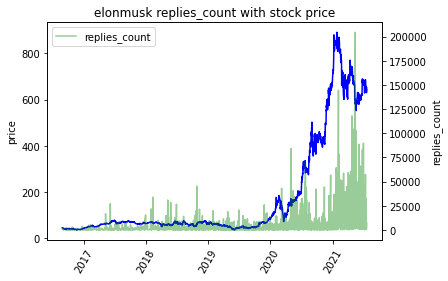|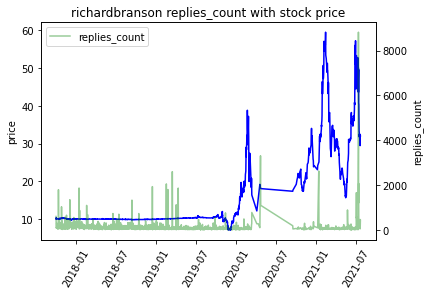

Plotting the replies count against the stock price shows some possible correlation. Richard Bransons stocks are interesting as we see virtually no movement for nearly a year, followed by a period of inactivity in his tweets in 2020, As shown in the horizontal stock price line between those dates. Nonetheless there appears to be a correlation once stocks start moving.

Photos as a media feature were then examined as the most important statistically significant import feature for Richard Branson. This is to get a sense as to how much the feature contributes to the predictions during model development and testing.

Fig 7(a) | Fig 7(b)
- | -
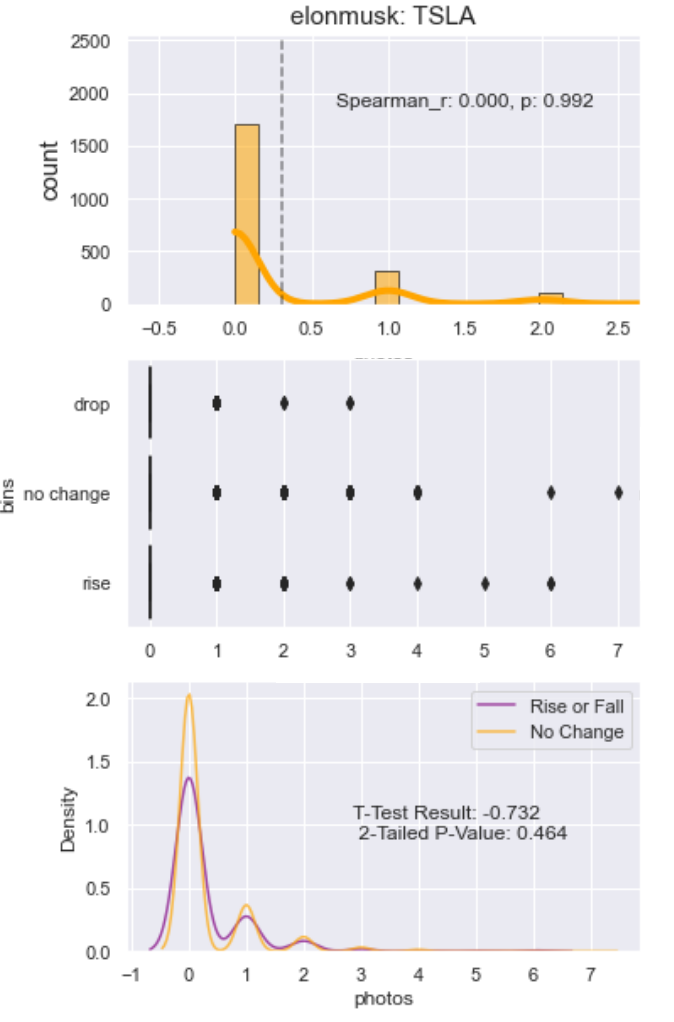|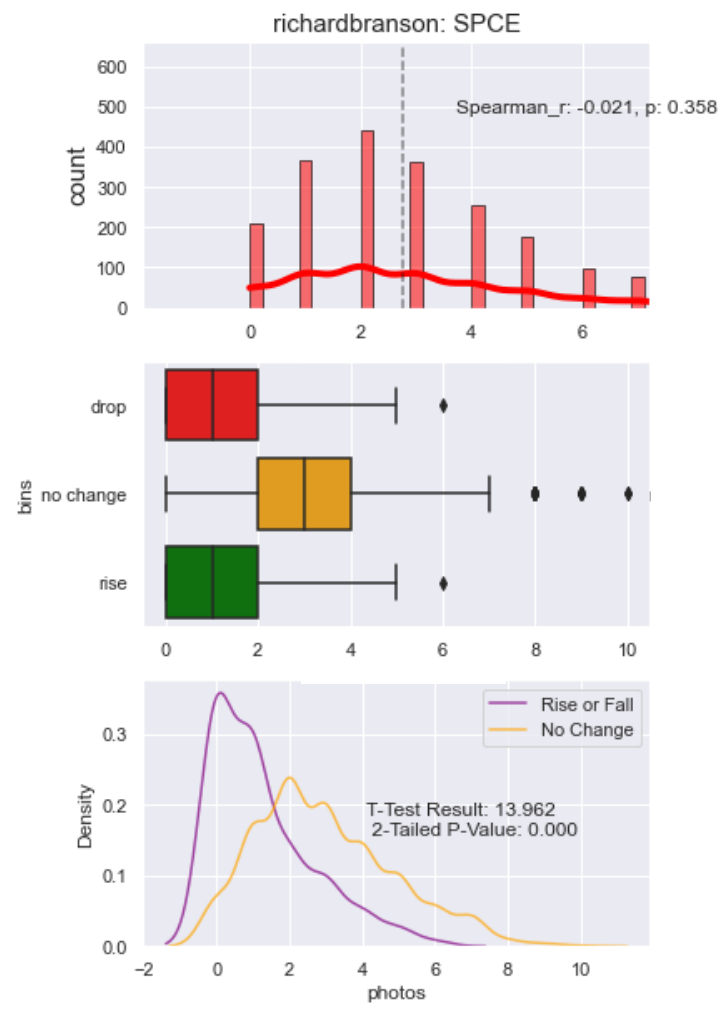

__Figure 7(a):__    
>Elon Musk Distribution (in Yellow), Box-Plot, and KDE for Photos, Pearson R, T-Test Score, and associated P values are annotated on the plots

__Figure 7(b):__  
>Richard Branson Distribution (in Red), Box-Plot, and KDE for Photos, Pearson R, T-Test Score, and associated P values are annotated on the plots

Elon Musk does not use a lot of media features in his tweets, averaging 0.30 photos per tweet compared to Branson's 2.76. There is a noticable difference in stocks that don't change vs those that do as seen in the box plots and kde plots in figure __7(b)__.

Fig 8(a) Elon Musk Poto Counts Against Stock Price | Fig 8(b) Richard Branson Photo Counts Against Stock Price
- | -
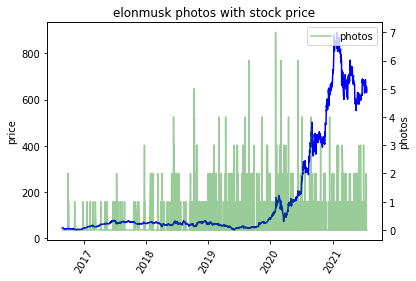|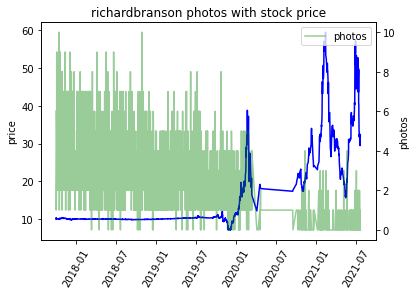

In this case, we can see that Musk's use of photos looks to fall within very specified range. Branson's photo counts in figure __8(b)__ look to have a strong correlation when price starts changing. 

# $\phi$k scores

Visual inspection of features that affect stock changes was done using a $\phi$k value.

Eryk Lewinson's article in Towards Data Science gives a great backgroud as to why it good to use in EDA: 
**Phik (𝜙k) — get familiar with the latest correlation coefficient**


Pearson’s correlation coefficient is a standard approach of measuring correlation between two variables. However, it has some drawbacks[^3]:

- It works only with continuous variables
- It only accounts for a linear relationship between variables
- It is sensitive to outliers

𝜙k offers several improvements over Pearson's. The key differentiators of $\phi$k are:

- It is based on several refinements to Pearson’s χ2 (chi-squared) contingency test — a hypothesis test for independence between two (or more) variables
- It works consistently between categorical, ordinal, and interval (continuous) variables
- It captures non-linear dependencies
- It reverts to Pearson’s correlation coefficient in the case of a bivariate normal distribution of the input
- the algorithm contains a built-in noise reduction technique against statistical fluctuations

$\phi$k's a correlation coefficient based on several refinements to Pearson’s hypothesis test of independence of two variables.

Using the coefficient, we can find variable pairs that have (un)expected correlations, and evaluate their statistical significance. We can also interpret the dependencies between each pair of variables.

Emphasis is paid to the proper evaluation of statistical significance of correlations and to the interpretation of variable relationships in a contingency table, in particular in case of low statistics samples.


Fig 9(a) $\phi$k Table of Elon Musk Features | Fig 9(b) $\phi$k Table of Richard Branson Features
- | -
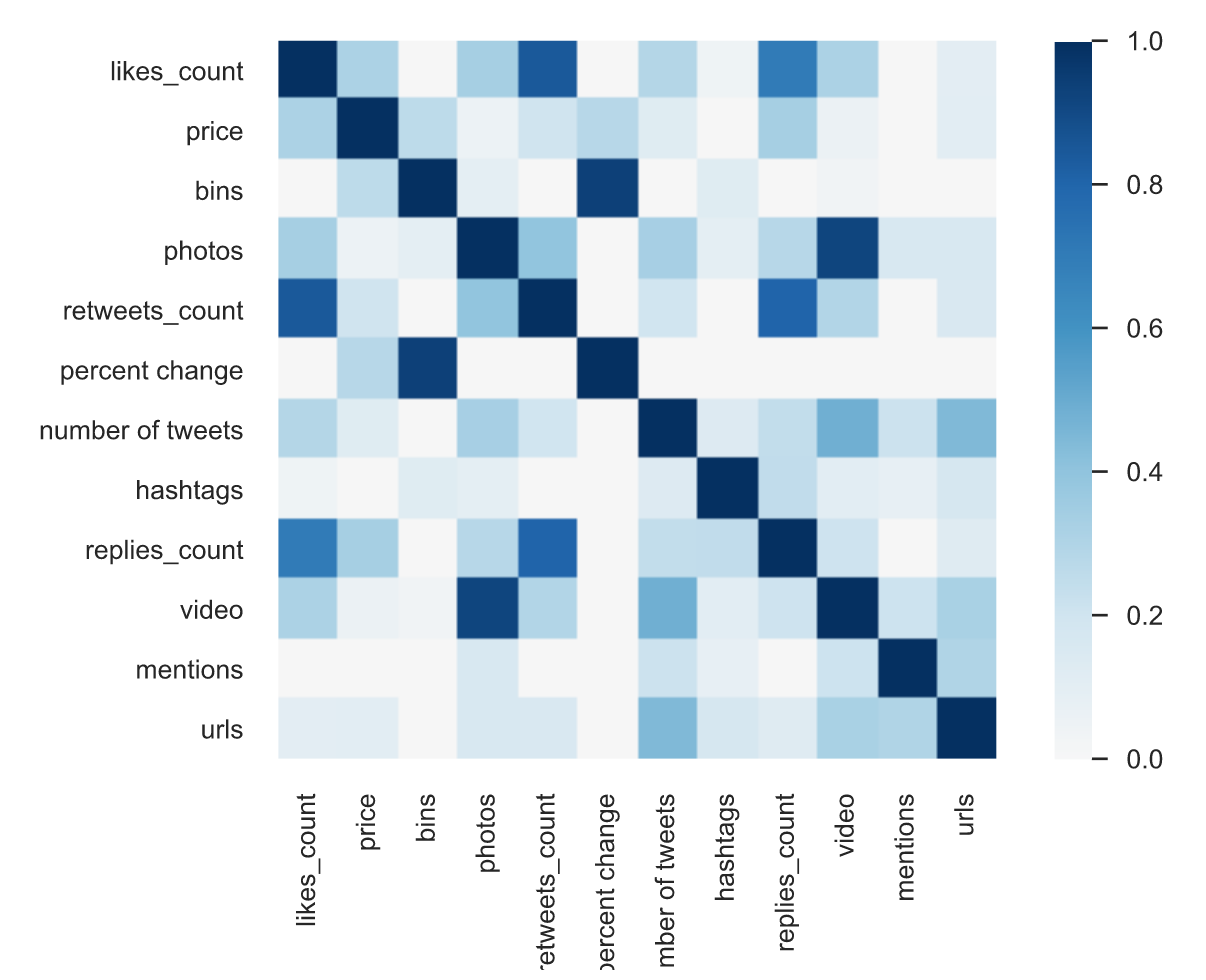|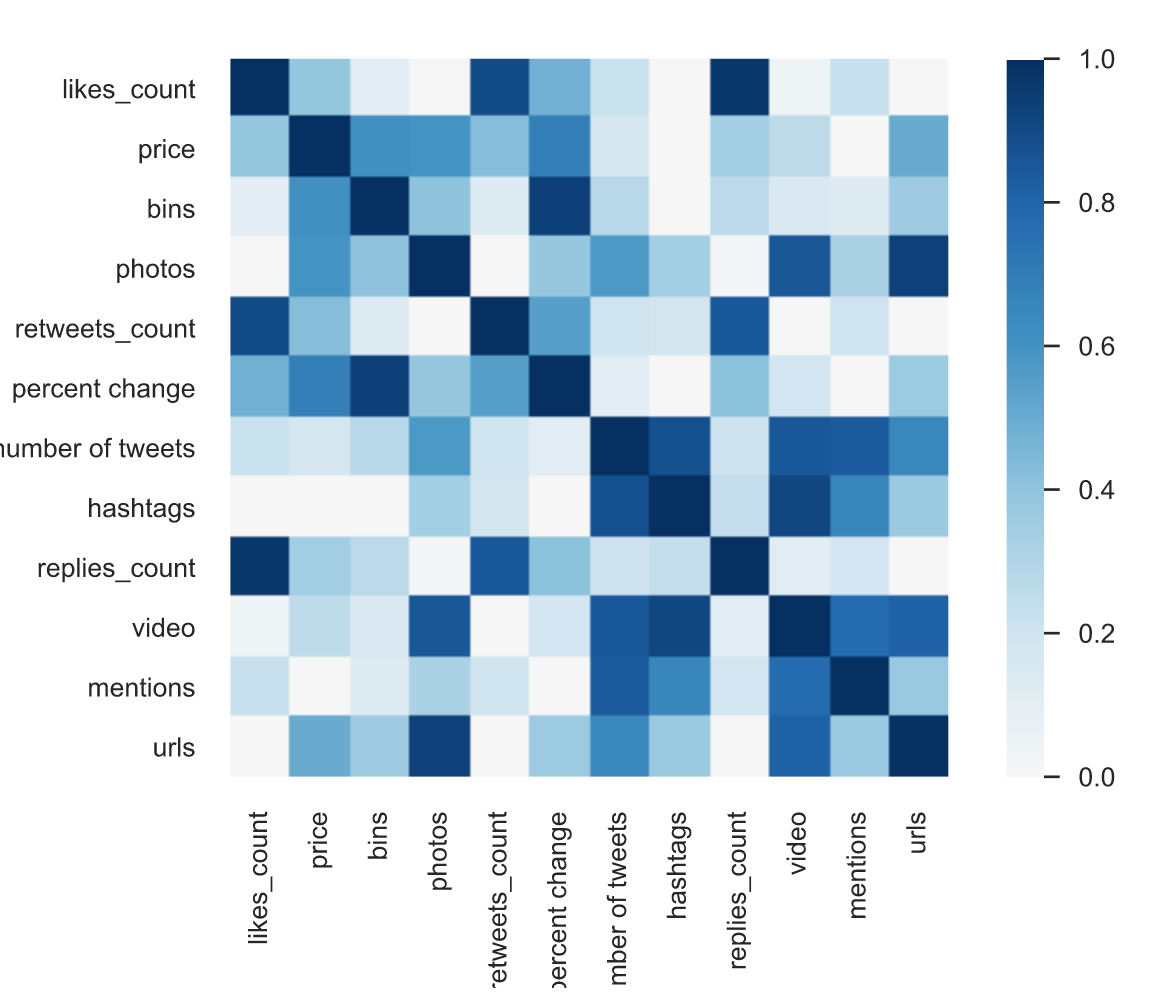

The scores for the target features of bins and percent change were examined, excluding their correlations with price and each other. 
> For Elon Musk, __fig 9(a)__'s price's highest scores were the time-sensitive features. With the percent changes separated by stocks that drop, stocks that don't change, and stocks that rise, the media features were more important. For percent change, there were no discerable relationships. 


> For Richard Branson, it is apparent there are many stronger correlations present than that of Elon Musk's twitter posts as seen in __9(b)__. For price, bins, and percent change, both time-sensitive and media features were significant, but media features were strongest with bins. 

***
## 5. Feature Engineering and Preprocessing

In an attempt to tease more data from the raw tweets, the counts of various features derived from the text were created:

- emoji counts
- number of sentences 
- number of words
- avg number of words per sentence

Additional features using Spacy were extracted, using the en_core_web_lg model for natural langauge processing:
- number of nouns
- number of verbs
- number of stopwords
- number of organizations mentioned in tweet (e.g. Tesla, SpaceX, Twitter, etc.)

## Text Cleaning

The twitter data needs to be cleaned prior to machine learning. In this effort, special characters, punctuation, numbers, and emojis were removed. The text was converted to lowercase and stop words, words shorter than 1 character, and words appearing only once in a document were removed. The final text is lemmatized before return the cleaned text data.

Tweet Increases Stock by 10.391%  
\========================  

| date                | tweet                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
|:--------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 2018-08-07 16:00:00 | Investor support is confirmed. Only reason why this is not certain is that it’s contingent on a shareholder vote. @MindFieldMusic Def no forced sales. Hope all shareholders remain. Will be way smoother &amp; less disruptive as a private company. Ends negative propaganda from shorts. @thatspacegeek Yes, but liquidity events would be limited to every 6 months or so (like SpaceX) Shareholders could either to sell at 420 or hold shares &amp; go private @heydave7 Absolutely. Am super appreciative of Tesla shareholders. Will ensure their prosperity in any scenario. @Gfilche My hope is *all* current investors remain with Tesla even if we’re private. Would create special purpose fund enabling anyone to stay with Tesla. Already do this with Fidelity’s SpaceX investment. @EvotoRentals Yes @FredericLambert I don’t have a controlling vote now &amp; wouldn’t expect any shareholder to have one if we go private. I won’t be selling in either scenario. Good morning 😀 @LizClaman @Tesla 420 Am considering taking Tesla private at $420. Funding secured. |

__Table 7:__  
>Collected raw twitter feeds occuring before August 7th, 2018 4:00 pm from Elon Musk.

| date                | cleaned                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
|:--------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 2018-08-07 16:00:00 | investor support confirm reason not certain contingent shareholder vote def force sale hope shareholder remain way smoother disruptive private company end negative propaganda short yes liquidity event limited month like spacex shareholder sell hold share private absolutely super appreciative tesla shareholder ensure prosperity scenario hope current investor remain tesla private create special purpose fund enable stay tesla fidelitys spacex investment yes not control vote not expect shareholder private not sell scenario good morning consider take tesla private funding secure |

__Table 8:__  
>Preprocessed twitter feeds from same date-time

### Vectorization

The cleaned text was converted into a sparse vector matrix to allow for machine learning. Only unigrams were considered, and the min_df was kept to the default of 1. Both of these features can be modified to see if any improvements in prediction capability can be made by looking at bi and tri-grams and the minimum number of documents that can be kept, but for this project unigrams were kept as support vector machine fit times scale quadratically with sample size. Because data is limited, the min df was kept to 1. Count Vectorizer was also considered, but early explorations didn't see much of a difference between these vectorization methods.



### Feature Scaling

Because the scale of the different count features varies significantly, the scales of the features were normalized between 0 and 1 using Min Max Scaler. Other scaling methods were not explored.

***
## 6. Modeling

### Selecting the Right Metrics

We could look at this problem in one of two ways: if an investor were to use this machine learning approach to evaluate investment opportunites from twitter data, assuming predicting stock price changes are the positive label and no stock changes are negative, an investor would prioritize predicting stock changes to examine investment opportunities, that is to minimize opportunity loss. This would be a reason to look at recall scores for model metrics as it provides an indication of missed positive predictions. 

>$Recall = TP / (TP + FN)$

Unlike precision that only comments on the correct positive predictions out of all positive predictions, recall provides an indication of missed positive predictions.

For imbalanced learning, recall is typically used to measure the coverage of the minority class.

Other metrics like F1 and the ROC-AUC score are also appropriate as it incorporates loss mitigation as a factor (both are indicators of how to optimize both precision and recall).

#### Training/Testing Splits

The following models were trained and evaluated on 70% of the total data. The remaining 30% was set aside for final model testing.

## Early Explorations

All of the feature sub-categories are included for the initial explorations. To this end, was subdiveded into bins that represent a stock change greater than ~2.5%, labelled as 1, or the positive class, and stocks under the 2.5% change as stocks that don't change, labelled as 0 or the negative class.

The distributions of these bins are shown below.

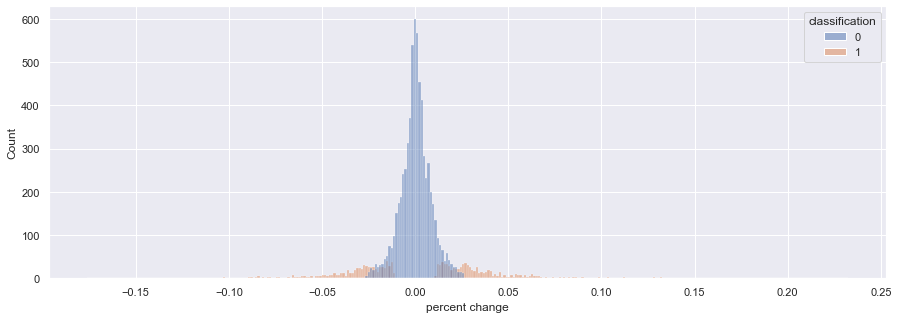
__Figure 10:__ 

>Distributions of stock price changes. Stock percent changes are subdivided into bins of not changing (*label = 0*) vs changing (*label = 1*) with a mean cutoff of $+/-$ 2.5%  = $+/-$ 1 std. The blue label 0 indicates no significant change in stock prices. The orange 1 label shows stocks that have changed past +/- 1 std from the mean

    class no change size: 6589.000
    class change size: 1484.000

This dataset is imbalanced. The positive class (change) makes up only ~18% of data. Recall refers to the true positive rate and summarizes how well the positive class was predicted. So we will judge our models off of this parameter, choosing models initially by ranking ROC-AUC scores. 

## Grid Search of Classifiers over Twitter Users

We applied three classification techniques (Logistic Regression, Support Vector Machines, Multinomial Naive Bayes) to the full training set of data. If the classifier supported class weighting, it was used. The scores were averaged over 5 trials. 

|    | username       | model                                                                    |   fit_time_mean |   fit_time_std |   score_time_mean |   score_time_std |   test_balanced_accuracy_mean |   test_balanced_accuracy_std |   test_precision_mean |   test_precision_std |   test_recall_mean |   test_recall_std |   test_f1_mean |   test_f1_std |   test_roc_auc_mean |   test_roc_auc_std |   n_samples |   n_pos_label |   n_features |
|---:|:---------------|:-------------------------------------------------------------------------|----------------:|---------------:|------------------:|-----------------:|------------------------------:|-----------------------------:|----------------------:|---------------------:|-------------------:|------------------:|---------------:|--------------:|--------------------:|-------------------:|------------:|--------------:|-------------:|
|  0 | richardbranson | LogisticRegression(class_weight={0: 1, 1: 4.440026954177897}, n_jobs=-1) |       1.78388   |    0.337945    |         0.0685234 |      0.00221177  |                      0.648705 |                    0.0601133 |              0.38088  |            0.101121  |          0.386232  |         0.111773  |      0.379458  |     0.0968902 |            0.790671 |          0.0344942 |         973 |           117 |           19 |
|  1 | richardbranson | SVC(class_weight={0: 1, 1: 4.440026954177897}, probability=True)         |       7.7049    |    0.203011    |         1.00153   |      0.0296884   |                      0.542468 |                    0.0259235 |              0.593333 |            0.136219  |          0.0931159 |         0.0533667 |      0.157942  |     0.0834277 |            0.764328 |          0.029931  |         973 |           117 |           19 |
|  2 | richardbranson | MultinomialNB()                                                          |       0.0476386 |    0.000728239 |         0.0677195 |      0.000660165 |                      0.5      |                    0         |              0        |            0         |          0         |         0         |      0         |     0         |            0.742757 |          0.050014  |         973 |           117 |           19 |
|  3 | Benioff        | LogisticRegression(class_weight={0: 1, 1: 4.440026954177897}, n_jobs=-1) |       1.04547   |    0.154655    |         0.0711415 |      0.00817086  |                      0.557241 |                    0.0487441 |              0.292266 |            0.0736057 |          0.277815  |         0.0938652 |      0.283557  |     0.0818369 |            0.599403 |          0.0749843 |         877 |           173 |           19 |
|  4 | Benioff        | SVC(class_weight={0: 1, 1: 4.440026954177897}, probability=True)         |       6.90156   |    0.142067    |         1.06207   |      0.0285883   |                      0.51256  |                    0.0206567 |              0.276667 |            0.180893  |          0.0521008 |         0.0480831 |      0.0855446 |     0.0756133 |            0.586782 |          0.0587864 |         877 |           173 |           19 |

__Table 9:__   
>Top 5 performing classifers with various twitter data. Displays average and std of times and scores

It's not surprising to see that Richard Branson's Twitter data had the highest classification scores (using ROC_AUC), given the statistically different significance betweem stocks that change vs. not change. The logistic regression classification performed the best and was signicantly faster than the support vector classification. We will tune the hyperparameters for the logistic regression classifier and see how much optimization we can acheive. Below are Elon Musk's scores, and there are no significant differences between the classification methods, assuming the data doesn't have any significant patterns that allow for predicting the different stock changes.

|    | username   | model                                                                    |   fit_time_mean |   fit_time_std |   score_time_mean |   score_time_std |   test_balanced_accuracy_mean |   test_balanced_accuracy_std |   test_precision_mean |   test_precision_std |   test_recall_mean |   test_recall_std |   test_f1_mean |   test_f1_std |   test_roc_auc_mean |   test_roc_auc_std |   n_samples |   n_pos_label |   n_features |
|---:|:-----------|:-------------------------------------------------------------------------|----------------:|---------------:|------------------:|-----------------:|------------------------------:|-----------------------------:|----------------------:|---------------------:|-------------------:|------------------:|---------------:|--------------:|--------------------:|-------------------:|------------:|--------------:|-------------:|
| 12 | elonmusk   | SVC(class_weight={0: 1, 1: 4.495575221238938}, probability=True)         |      11.3911    |     0.248364   |         1.73557   |      0.0373565   |                      0.496061 |                    0.011952  |              0.08     |            0.178885  |           0.01     |         0.0223607 |      0.0177778 |     0.0397523 |            0.498181 |          0.0483363 |        1040 |           201 |           19 |
| 13 | elonmusk   | LogisticRegression(class_weight={0: 1, 1: 4.495575221238938}, n_jobs=-1) |       1.35609   |     0.0559698  |         0.0787651 |      0.000818128 |                      0.501841 |                    0.0349884 |              0.192783 |            0.0612707 |           0.183659 |         0.0721607 |      0.187606  |     0.0672479 |            0.493166 |          0.0397831 |        1040 |           201 |           19 |
| 14 | elonmusk   | MultinomialNB()                                                          |       0.0599119 |     0.00593334 |         0.0959557 |      0.0187183   |                      0.5      |                    0         |              0        |            0         |           0        |         0         |      0         |     0         |            0.487371 |          0.0383289 |        1040 |           201 |           19 |

__Table 10:__  
>Performance of Elon Musk's data with the three classifiers

It's also somewhat surprising to see that Elon Musk's scores were much lower, and that there wasn't a huge difference between the different classifiers, given that this data contains the time-sensitive features. 

## Examining Best Model

    richardbranson
    LogisticRegression(class_weight={0: 1, 1: 4.440026954177897}, n_jobs=-1)
    
    Test_roc_auc_mean: 0.791
    Test_roc_auc_std: 0.034
    Range of test_roc_auc_mean: 0.756 -- 0.825
    The mean cross-validation accuracy is: 0.837 +/- 0.025
    Precision: 0.415
    Recall: 0.440
    Balanced accuracy: 0.678

                  precision    recall  f1-score   support

               0       0.92      0.92      0.92       368
               1       0.42      0.44      0.43        50

        accuracy                           0.86       418
       macro avg       0.67      0.68      0.67       418
    weighted avg       0.86      0.86      0.86       418

Fig 11(a) | Fig 11(b) | Fig 11(c)
- | - | -
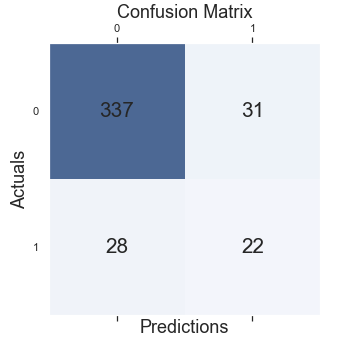|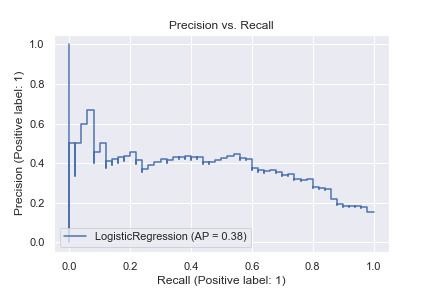|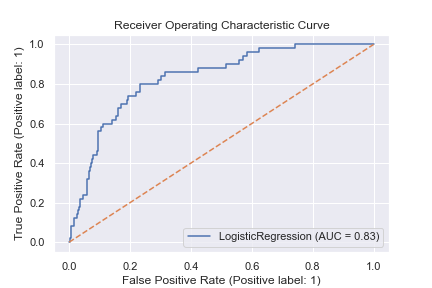

On examining the top model, we can see from __11(a)__ that it predicted no change 337 out of 368 correctly (91.58%) and change 22 out of 50 correctly (44.00%), with an overall accuracy of 86%. The ROC AUC range of values is between 0.756 and 0.825, so it's scoring doesn't vary too wildly. The precision hovers around 0.4 then drops when recall reaches 0.6 as shown in __11(b)__. This gives us an idea of thresholding later on.

# Hyperparameter Tuning

A grid search tuning logistic regrssion's C value, penalty, solver, and boolean dual was cross validated 10 times per classifer's parameters. The average results were scored and ranked via ROC_AUC curves

richardbranson
LogisticRegression(class_weight={0: 1, 1: 7.3293413173652695}, n_jobs=-1,
                   penalty='l1', solver='saga')

The mean cross-validation accuracy is: 0.771 +/- 0.027
Precision: 0.330
Recall: 0.760
Balanced accuracy: 0.775


                  precision    recall  f1-score   support

               0       0.96      0.79      0.87       368
               1       0.33      0.76      0.46        50

        accuracy                           0.79       418
       macro avg       0.65      0.78      0.66       418
    weighted avg       0.89      0.79      0.82       418

Fig 12(a) | Fig 12(b) | Fig 12(c)
- | - | -
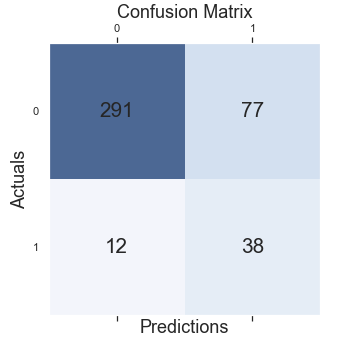|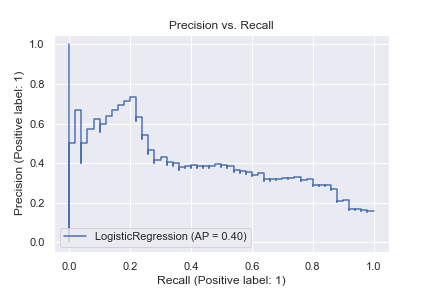|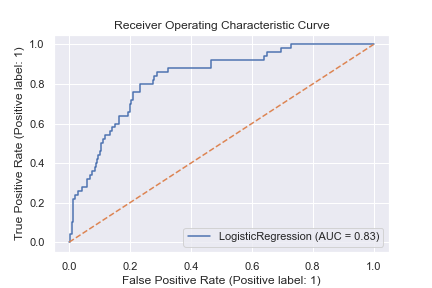

While the AUC Score in __12(c)__ didn't change, we can see a greater average precision in __12(b)__ and the confusion matrix, __12(a)__ indicates the model underperforms picking stocks that don't change (79% vs 92%), but increases when selecting stocks that do (76% vs 44%). While the overall accuracy slightly dropped (from 86% down to 79%), as we are prioritizing positive class prediction, the 32% increase is welcome.

# Business-Case Testing and Modeling
In our scenario, an investor would want to see stock changes as quickly as possible, so the twitter features number of replies, retweets, and likes should be discarded as a prediction of new stock price changes on trained on historical data wouldn't have nearly as many counts in those features, and thus aren't a good representation of a real-world application.

    Important Features (without time-sentive features and with engineered features):

       avg words per sentence 0.089 +/- 0.002
              number of nouns 0.066 +/- 0.002
                 tweet length 0.063 +/- 0.001
                       photos 0.062 +/- 0.002
             number of tweets 0.057 +/- 0.002
          number of stopwords 0.055 +/- 0.001
             number of emojis 0.044 +/- 0.001
              number of verbs 0.042 +/- 0.002
                         urls 0.038 +/- 0.001
                        video 0.034 +/- 0.002
              number of words 0.032 +/- 0.001
          number of sentences 0.027 +/- 0.001
                     mentions 0.025 +/- 0.001
      number of organizations 0.024 +/- 0.001
                     hashtags 0.018 +/- 0.001
                     cashtags 0.001 +/- 0.000

The same grid search used before was applied again, this time without the time-sensitive features.

|    | username       | model                                                                    |   fit_time_mean |   fit_time_std |   score_time_mean |   score_time_std |   test_balanced_accuracy_mean |   test_balanced_accuracy_std |   test_precision_mean |   test_precision_std |   test_recall_mean |   test_recall_std |   test_f1_mean |   test_f1_std |   test_roc_auc_mean |   test_roc_auc_std |   n_samples |   n_pos_label |   n_features |
|---:|:---------------|:-------------------------------------------------------------------------|----------------:|---------------:|------------------:|-----------------:|------------------------------:|-----------------------------:|----------------------:|---------------------:|-------------------:|------------------:|---------------:|--------------:|--------------------:|-------------------:|------------:|--------------:|-------------:|
|  0 | richardbranson | LogisticRegression(class_weight={0: 1, 1: 4.440026954177897}, n_jobs=-1) |       1.69608   |    0.433501    |         0.0695798 |      0.00258659  |                      0.642933 |                    0.0448721 |              0.35164  |            0.0688287 |          0.385145  |         0.0934825 |      0.363525  |     0.0669033 |            0.79977  |          0.0271385 |         973 |           117 |           16 |
|  1 | richardbranson | SVC(class_weight={0: 1, 1: 4.440026954177897}, probability=True)         |       8.38487   |    1.55123     |         1.01782   |      0.165583    |                      0.54763  |                    0.0205386 |              0.515714 |            0.138173  |          0.111594  |         0.0497875 |      0.176653  |     0.0660425 |            0.775547 |          0.0351316 |         973 |           117 |           16 |
|  2 | richardbranson | MultinomialNB()                                                          |       0.0474452 |    0.000704086 |         0.0681663 |      0.00102037  |                      0.5      |                    0         |              0        |            0         |          0         |         0         |      0         |     0         |            0.761457 |          0.0295217 |         973 |           117 |           16 |
|  3 | Benioff        | SVC(class_weight={0: 1, 1: 4.440026954177897}, probability=True)         |       6.54975   |    0.0457198   |         1.00865   |      0.00941416  |                      0.514802 |                    0.0223557 |              0.264127 |            0.18724   |          0.0579832 |         0.0542521 |      0.0930995 |     0.0837707 |            0.603047 |          0.0448385 |         877 |           173 |           16 |
|  4 | Benioff        | LogisticRegression(class_weight={0: 1, 1: 4.440026954177897}, n_jobs=-1) |       0.914553  |    0.0442461   |         0.0649292 |      0.00452285  |                      0.55809  |                    0.0348754 |              0.310198 |            0.0876734 |          0.277983  |         0.0723016 |      0.286235  |     0.0538223 |            0.578664 |          0.0410235 |         877 |           173 |           16 |
|  5 | JohnLegere     | MultinomialNB()                                                          |       0.0644825 |    0.000569719 |         0.076102  |      0.000556757 |                      0.5      |                    0         |              0        |            0         |          0         |         0         |      0         |     0         |            0.547768 |          0.0194593 |        1632 |           342 |           16 |
|  6 | elonmusk       | LogisticRegression(class_weight={0: 1, 1: 4.440026954177897}, n_jobs=-1) |       1.37807   |    0.0641029   |         0.0758756 |      0.00117213  |                      0.505284 |                    0.0314123 |              0.205848 |            0.0562566 |          0.192567  |         0.0599164 |      0.197988  |     0.05613   |            0.530443 |          0.0553866 |        1054 |           208 |           16 |

__Table 11:__
> >Top 7 performing classifers with various twitter data. Displays average and std of times and scores

The resuls are much the same as before, though Elon Musk performed better without the time-sensitive features, which is suprising. We are going to examine the top 2 models and look at Elon Musk's best perfoming model to see how the different classifiers are working in comparison to each other as well as across different datasets.

#### The Best Model

    richardbranson
    LogisticRegression(class_weight={0: 1, 1: 4.440026954177897}, n_jobs=-1)
    
    Test_roc_auc_mean: 0.800
    Test_roc_auc_std: 0.027
    Range of test_roc_auc_mean: 0.773 -- 0.827
    The mean cross-validation accuracy is: 0.829 +/- 0.021
    Precision: 0.435
    Recall: 0.400
    Balanced accuracy: 0.665
    
                  precision    recall  f1-score   support

               0       0.92      0.93      0.92       368
               1       0.43      0.40      0.42        50

        accuracy                           0.87       418
       macro avg       0.68      0.66      0.67       418
    weighted avg       0.86      0.87      0.86       418

Fig 13(a) | Fig 13(b) | Fig 13(c)
- | - | -
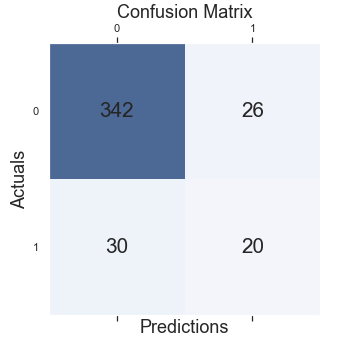|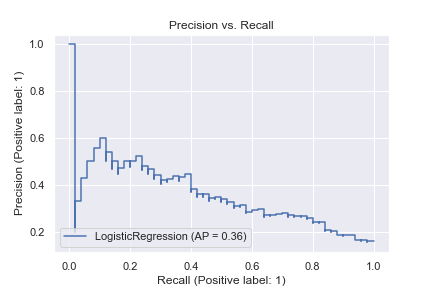|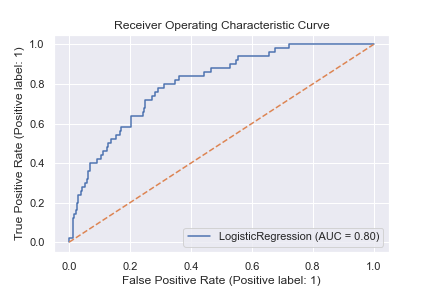

Again we have Richard Branson with the Logistic Regression Classification. When examined in comparison to the inclusion time-sensitive feature performance, we are seeing some differences. The percentage of correctly classified stocks that did not change is roughly the same (92% vs 91.6%) and is for predicting change (40% vs 44%) and an accuracy of 87% vs the 86% before. However we can see that the precision recall curve __13(b)__ has a precision reaching 60% before decreasing as recall increases. Let's look at the support vector machine classifer in comparison.

#### SVM

    richardbranson
    SVC(class_weight={0: 1, 1: 4.440026954177897}, probability=True)
    
    Test_roc_auc_mean: 0.776
    Test_roc_auc_std: 0.035
    Range of test_roc_auc_mean: 0.740 -- 0.811
    The mean cross-validation accuracy is: 0.877 +/- 0.007
    Precision: 0.333
    Recall: 0.080
    Balanced accuracy: 0.529
    
                  precision    recall  f1-score   support

               0       0.89      0.98      0.93       368
               1       0.33      0.08      0.13        50

        accuracy                           0.87       418
       macro avg       0.61      0.53      0.53       418
    weighted avg       0.82      0.87      0.83       418

Fig 14(a)| Fig 14(b) | Fig 14(c)
- | - | -
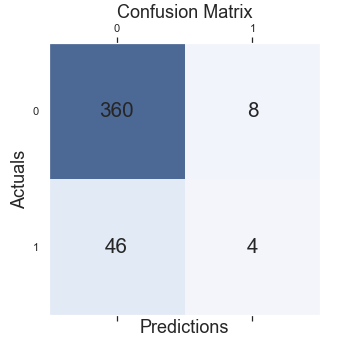|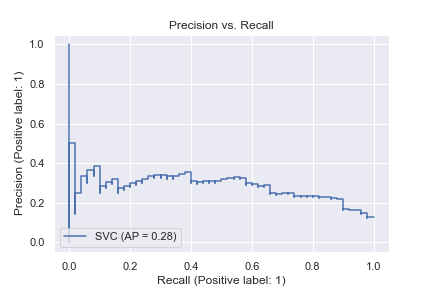|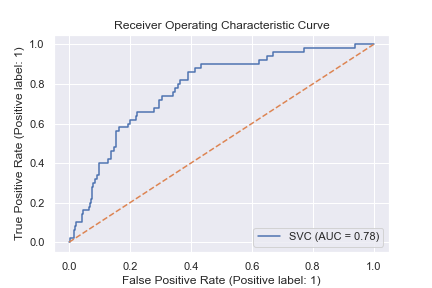

While Support Vector Machines were better in predicting stocks that didn't change (98%) it fared much poorer at predicting stock changes, correctly doing so only 8% of the time. The precision recall curve in __14(b)__ shows that improving the recall won't allow for much change in the precision.

#### Elon Musk's Best Model

    elonmusk
    LogisticRegression(class_weight={0: 1, 1: 4.440026954177897}, n_jobs=-1)
    
    Test_roc_auc_mean: 0.530
    Test_roc_auc_std: 0.055
    Range of test_roc_auc_mean: 0.475 -- 0.586
    The mean cross-validation accuracy is: 0.685 +/- 0.023
    Precision: 0.174
    Recall: 0.180
    Balanced accuracy: 0.485
    
                  precision    recall  f1-score   support

               0       0.80      0.79      0.79       363
               1       0.17      0.18      0.18        89

        accuracy                           0.67       452
       macro avg       0.49      0.49      0.49       452
    weighted avg       0.67      0.67      0.67       452

Fig 15(a) | Fig 15(b) | Fig 15(c)
- | - | -
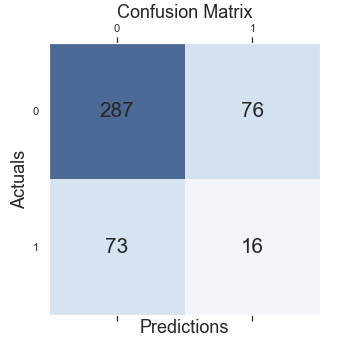|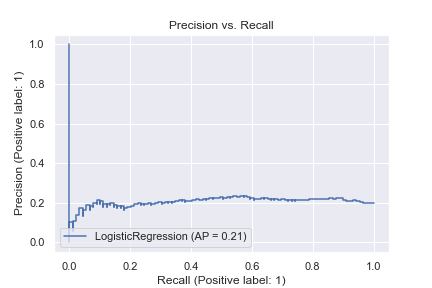|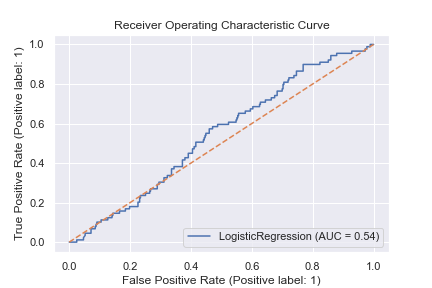

From figures __15 a,b__ we can see that the same model that performs well with Richard Branson's tweets undeperforms when applied to Elon Musk's tweets. The ROC AUC score at 54% is little better than guessing. 

It should be noted that dimension reduction using PCA for the numerical features, and TruncatedSVD were evaluated. Reducing dimensions to account for 95% of variance in the data had a slightly negative impact (as to be expected), and so were not used in model optimization.

# Running Testing Data

    Important Features for Richard Branson (Training Data):

                       photos 0.058 +/- 0.004
       avg words per sentence 0.038 +/- 0.003
                 tweet length 0.035 +/- 0.003
          number of stopwords 0.033 +/- 0.003
              number of verbs 0.032 +/- 0.002
                         urls 0.029 +/- 0.003
                     mentions 0.027 +/- 0.003
              number of nouns 0.024 +/- 0.002
              number of words 0.022 +/- 0.003
                     hashtags 0.017 +/- 0.002
                        video 0.013 +/- 0.002
             number of tweets 0.011 +/- 0.002
          number of sentences 0.006 +/- 0.001
      number of organizations 0.003 +/- 0.001
             number of emojis 0.001 +/- 0.000

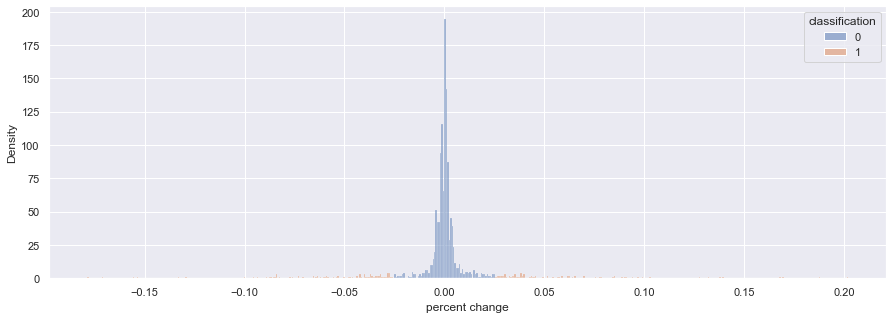
__Figure 16:__
>Percent Change Distributions for Ricahrd Branson

Statistics for Richard Branson Percent Change Distribution


    count    1391.000000
    mean        0.000262
    std         0.024693
    min        -0.178809
    25%        -0.002079
    50%         0.000000
    75%         0.002010
    max         0.202145
    ---------------------------------------
    number of no change samples:       1224
    number of change samples:           167               
    lower bin boundary:               -2.5%
    upper bin boundary:                2.5%


#### Optimizing Model and Fitting Test Data

    richardbranson
    LogisticRegression(class_weight={0: 1, 1: 4.396390374331551}, n_jobs=-1,
                       penalty='l1', solver='saga')
                       
    The mean cross-validation accuracy is: 0.816 +/- 0.006
    Precision: 0.364
    Recall: 0.494
    Balanced accuracy: 0.677
                  precision    recall  f1-score   support

               0       0.91      0.86      0.88       531
               1       0.36      0.49      0.42        87

        accuracy                           0.81       618
       macro avg       0.64      0.68      0.65       618
    weighted avg       0.83      0.81      0.82       618

Fig 17(a) | Fig 17(b) | Fig 17(c)
- | - | -
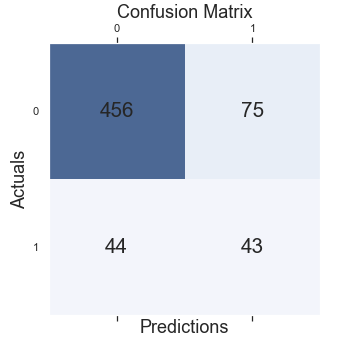|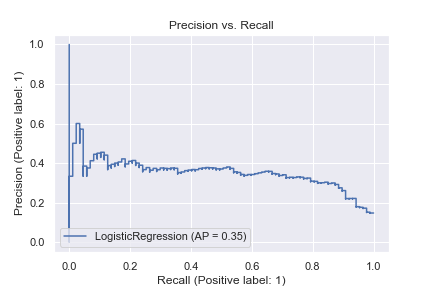|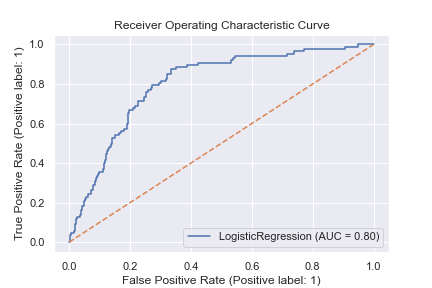

The optimized model perfomed similarly to the model valuated using the training data. It correctly predicted __no change__ __86%__ of time, and __change__ __50%__ of the time. Using thresholding we can optimize the number of correctly predicted change values at the expense of predicted no change. The overall accuracy is __81%__

# Thresholding

    Threshold: 0.316

    richardbranson
    LogisticRegression(class_weight={0: 1, 1: 4.396390374331551}, n_jobs=-1,
                       penalty='l1', solver='saga')
                  precision    recall  f1-score   support

               0       0.96      0.70      0.81       531
               1       0.31      0.80      0.45        87

        accuracy                           0.72       618
       macro avg       0.63      0.75      0.63       618
    weighted avg       0.87      0.72      0.76       618

Fig 18(a) Threshold of 0.316 | Fig 18(b) Confusion Matrix with Applied Threshold
- | -
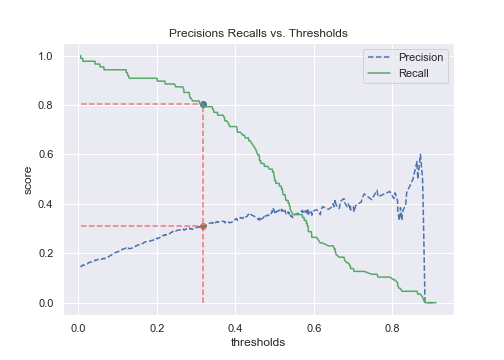|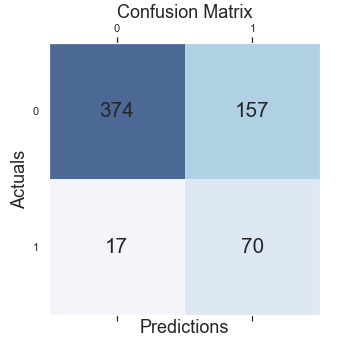

      Confusion Matrix Metrics
      ===========================
      Of stocks that actually change, how often does the classifier correctly predict them (Sensitivity)?
      80.50%
      
      Of stocks that don't change, how often does the classifier correctly predict them (Specificity)?
      70.43%
      
      How often is the classifier correct?
      Accuracy: 70.605%

      When it predicts yes, how often is it correct?
      Precision: 30.837%

      When it's actually no, how often does it predict yes?
      False Positive Rate: 29.567%

Using thresholding we were able to increase the number of correctly predicted stock changes by __31%__ at the expense of __-9%__ accuracy and __-16%__ correctly predicted no change values. To an investor this would be ideal in making sure that they capture stock changes as quickly as possible. We lose out on precision, wich is how often is the classifer correct when it predicts stock changes, but to minimize opportunity loss we optimize recall.

***
## 7. Interpretability and Conclusions


To assess the model, the most predictive words were analyzed for each group and the most predictive word for change, the positive class, was examined.

 
    Most Predictive Words for No Change         Most Predictive Words for Change
     
                like 1.00                                  sneak 0.99
             million 1.00                                 crisis 0.99
                high 1.00                            spaceflight 1.00
                love 1.00                                 repair 1.00
                need 1.00                                 reckon 1.00
               enjoy 1.00                                   kill 1.00
                hope 1.00                                  grand 1.00
                know 1.00                                  beach 1.00
               quote 1.00                           conversation 1.00
                 not 1.00                              executive 1.00           

The most predictive words for Richard Branson, we see spaceflight in the bin for change, which makes sense given we are examining Virgin Galactic stock changes. Sneak, crisis, and kill may be related to discussions about company projects or goals (both positive and negative), though examining their context would provide more insight.

For no change, words that express sentiment, such as like, love, enjoy, and hope seem to indicate little stock movement. This may be due to tweets that are about personal interests outside of the stock have little impact on the stock itself, whereas words discussing the company itself are more impactful. 

Looking at the word **spaceflight**

    Document id: 1420
    Percent Change: -0.001
    Probability(Change) = 0.062
    True class: no change

Original Tweet:
>*'.@VirginGalactic is moving to New Mexico  https://t.co/kSsQC1PQJw  https://t.co/JSoNjeTABM We have now completed two spaceflights and we’ll carry on the flight test program in New Mexico  https://t.co/kSsQC1PQJw @VirginGalactic  https://t.co/7qWrvr1Hlf It’s going to be special to see the world’s most beautiful spaceship fly from one of the world’s most wonderfully designed buildings, Spaceport America  https://t.co/kSsQC1PQJw @virgingalactic  https://t.co/owrz1dOBOy Thrilled to announce that @VirginGalactic is taking its next step towards full commercial service by moving its operations to Spaceport America in New Mexico this summer  https://t.co/kSsQC1PQJw  https://t.co/WAIb2fXrPa Watch live: Thrilled to announce @virgingalactic's next step towards commercial service  https://t.co/1iyX7kZEYg  https://t.co/bgBxzqwLIM"

Fig 19(a) Highlighted Cleaned Text| Fig 19(b) Text Probability | Fig 19(c) Feature Probability
- | - | -
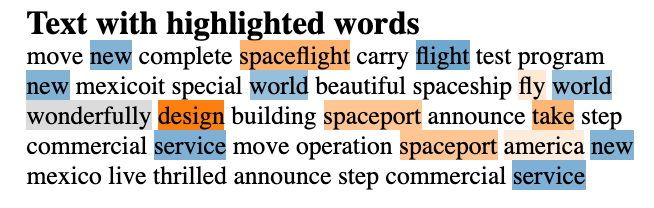|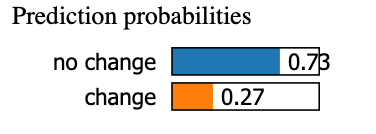|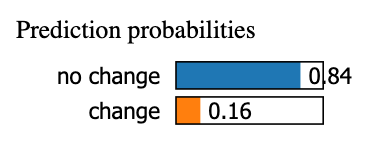

Figure __19(a)__ gighlights the words in the text that are impactful of the bins. We can see that the text overall predicts a __73%__ chance that stocks are not going to change, which is correct. The percent change for this tweet is __-0.1%__. Despite this, the tweet is discussing Virgin Galactic directly, so not only is it surprising that it correctly predicted no change, but that there was actually no associated change with the stock. The words design, spaceflight, spaceport, and take are associated with stock changes, but oddly flight itself is associated with no cahnges. The overall prediction based off the text features is in figure __19(b)__ and the predictions for the numerical features are in __19(c)__. In this case the features were more accurate in their prediction, and we can see which ones had the greatest impact below.

Fig 20(a) Word Contributions to Predictions | Fig 20(b) Feature Contibutions to Predictions
- | -
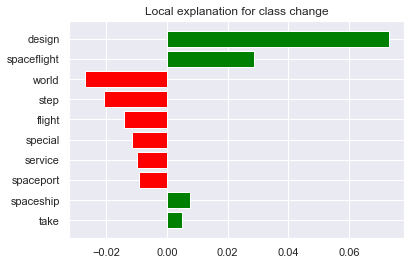|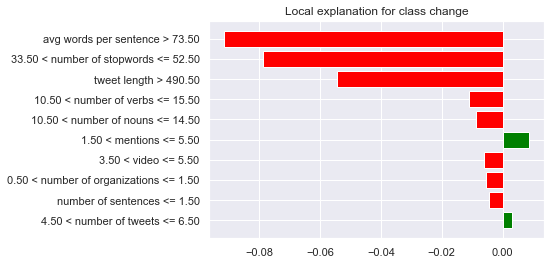

Figure __20(a)__ shows each word's contribution to the overall prediction, with most showing no change. For the features in __20(b)__ Shows that the average number of words in this tweet is strongly predictive of no change (> 73.50), whereas the number of stopwords between 33.50 and 52.50 is secondmost in the correct prediction. The strongly predictive features in the tweet are based off the text itself and not the media features, which is unexpected.

## Examining Misclassifications

Change was incorrectly predicted as no change 17 times. The worst misclassification is examined.

#### Top misclassification of incorrectly predicting no change

    Document id: 1789
    Percent Change: -0.038
    Probability(Change) = 0.60%
    True class: change

Original Tweet:
>*'Climate change creates huge opportunities for innovation, not least in transportation. Here’s one example  https://t.co/yEPnQFirpo #RunOnLess  https://t.co/ypbp5RmDZl How to develop a team of leaders:  https://t.co/P0qc7kD55K @virginmobilecan #readbyrichard  https://t.co/PSKjZgaGoo Exciting project to modernise Saudi Arabia &amp; welcome tourists to beautiful undiscovered country &amp; stunning landscape  https://t.co/jIFLJ10wBe  https://t.co/GUmn8qxdKJ @apolloxxxx Thank you for your kind words @RdzSaint Forget one, here’s 65 – not all on entrepreneurship, but all useful for an entrepreneur  https://t.co/wTT9njdKlh As a kid one of my heroes was Lawrence of Arabia. Treat to see this restored train he blew up in Saudi Arabia  https://t.co/jIFLJ10wBe  https://t.co/X2SDLsHQU8 @sarah_robes15 Thank you Sarah, that’s lovely to hear. Next up - #FindingMyVirginity @ErranteMec I’m delighted to hear you enjoyed it. My new autobiography is out next month too, so good timing! #FindingMyVirginity Visited incredible UNESCO World Heritage Site, Mada’in Saleh. Privelige to see this awe-inspiring ancient ruin  https://t.co/jIFLJ10wBe  https://t.co/CtHQ1Rprsf Quite an experience to be in Saudi Arabia on the day women were given the right to drive for the 1st time  https://t.co/jIFLJ10wBe  https://t.co/mdFeQz4Q94 Just enjoyed a fascinating visit to Saudi Arabia, a country where great change is taking place step by step  https://t.co/jIFLJ10wBe'*

Fig 21(a) Highlighted Cleaned Text| Fig 21(b) Text Probability | Fig 21(c) Feature Probability
- | - | - 
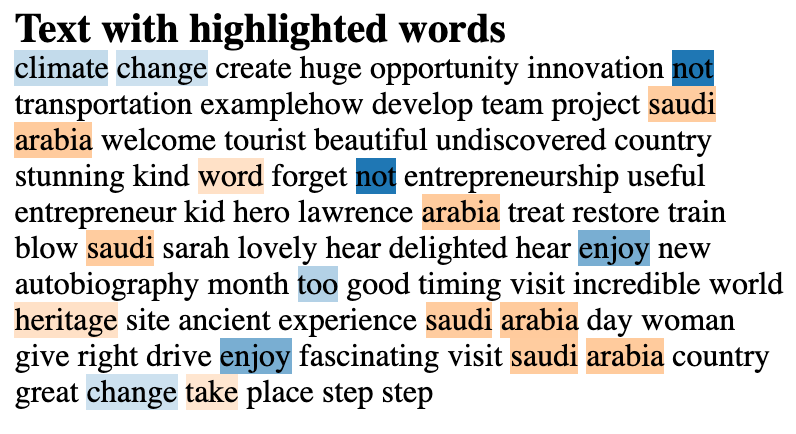|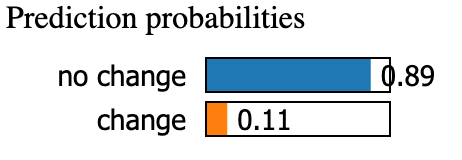|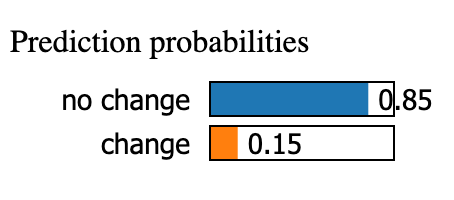

The model incorrectly predicted that there's only  __6.3%__ confidence that the stock was going to change when, in fact, it did. The actual stock dropped __-3.8%__ and is well below the __-2.5%__ cutoff. There are a few things about this tweet that make it hard to predict. There were 11 tweets between the previous closing price and the next one, and Richard Branson averages roughly 3/day, so there's a lot of diparate ideas collected together here. Discussions of climate change, modernizing Saudi Arabia, his autobiography, and a correspondence with Sarah are linked together. Not is a stop word that was included in the text, and it has a strong impact on no change prediction. Removing some stop words is something to look into for future explorations.

Fig 22(a) Word Contributions to Predictions | Fig 22(b) Feature Contibutions to Predictions
- | -
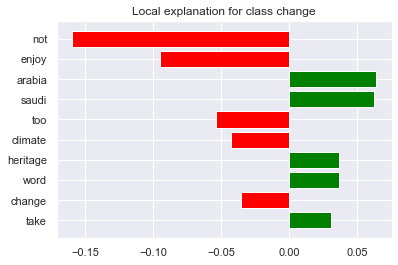|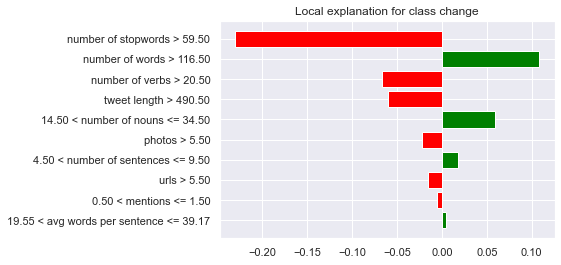

Figure __22(a)__ shows words describing climate change are predictive of no stock movement. The number of stopwords, verbs, and length of the tweet are much more impactful that the correctly predictions made by the number of words, nouns, and sentences shown in __22(b)__. 

The model misclassified no change as change 157 times

#### Top misclassification of incorrectly predicting no change

    Top misclassification
    Document id: 1737
    Percent Change: 0.002
    Probability(Change) = 91.07%
    True class: no change

Original Tweet:
>*'Discussing the future of design, #STEM and what it takes to paint a rocket with Heidi Rueff - @Virgin_Orbit’s graphic designer:  https://t.co/9A8bS11DoM #VirginFamily  https://t.co/8vvuvruqtt'*

Fig 23(a) Highlighted Cleaned Text| Fig 23(b) Text Probability | Fig 23(c) Feature Probability
- | - | -
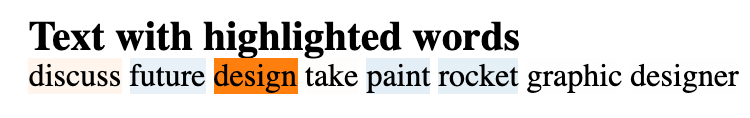|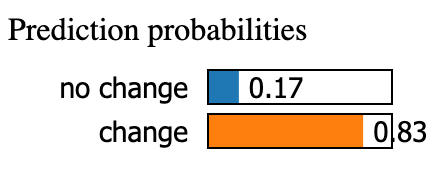|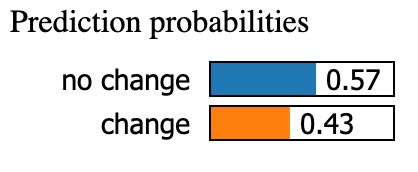

The model predicts that stocks change with __91%__ confidence, but the percent change is only __0.2%__. This tweet has the opposite problem where it is very short, and the text does a much poorer job at predicting the correct class than the features do. In this case the features *correctly* predicted the stock not to change (figure __23(c)__. As the word design is so strongly indicative of stocks changing, it's impact on a short tweet like the one above can sway the algorithm to make the incorrect predictions.

Fig 24(a) Word Contributions to Predictions | Fig 24(b) Feature Contibutions to Predictions
- | -
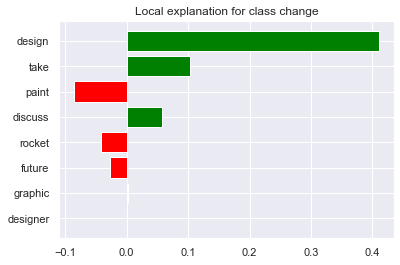|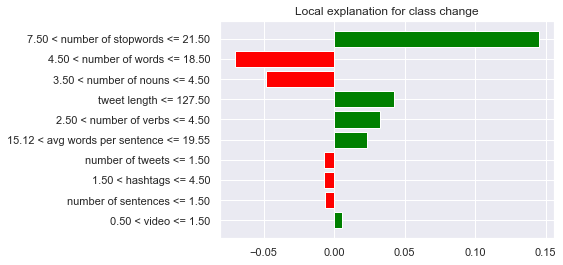

Again, the engineered features seems to be the strongest influencer on making the correct prediction __24(b)__. Model Predictions using just the text and the features wil be examined to see if one or the other is better alone in making correct predictions.

# Just Features

    richardbranson
    LogisticRegression(C=0.1, class_weight={0: 1, 1: 4.440026954177897}, n_jobs=-1,
                       penalty='l1', solver='liblinear')
                       
    The mean cross-validation accuracy is: 0.788 +/- 0.024
    Precision: 0.141
    Recall: 1.000
    Balanced accuracy: 0.500
    
                  precision    recall  f1-score   support

               0       0.00      0.00      0.00       531
               1       0.14      1.00      0.25        87

        accuracy                           0.14       618
       macro avg       0.07      0.50      0.12       618
    weighted avg       0.02      0.14      0.03       618

Just using features correctly predicts all of the stocks that changed, but misses all of the stocks that don't change. 

# Just Words


    richardbranson
    LogisticRegression(C=0.01, class_weight={0: 1, 1: 4.440026954177897}, n_jobs=-1,
                       solver='liblinear')
                       
    The mean cross-validation accuracy is: 0.880 +/- 0.002
    Precision: 0.000
    Recall: 0.000
    Balanced accuracy: 0.500
                  precision    recall  f1-score   support

               0       0.86      1.00      0.92       531
               1       0.00      0.00      0.00        87

        accuracy                           0.86       618
       macro avg       0.43      0.50      0.46       618
    weighted avg       0.74      0.86      0.79       618

Oddly, using just words has the opposite effect in correctly predicting when stocks don't change, but missing all of the times when stocks do change. The combination of tweets and features is necessary to get any predictive power from the model.

# Conclusions

Overall, we were able to make predictions about an executive's stock changes over a very nuanced set of features. The way in which a person tweets has a sizable impact on whether or not predictions can be made. 


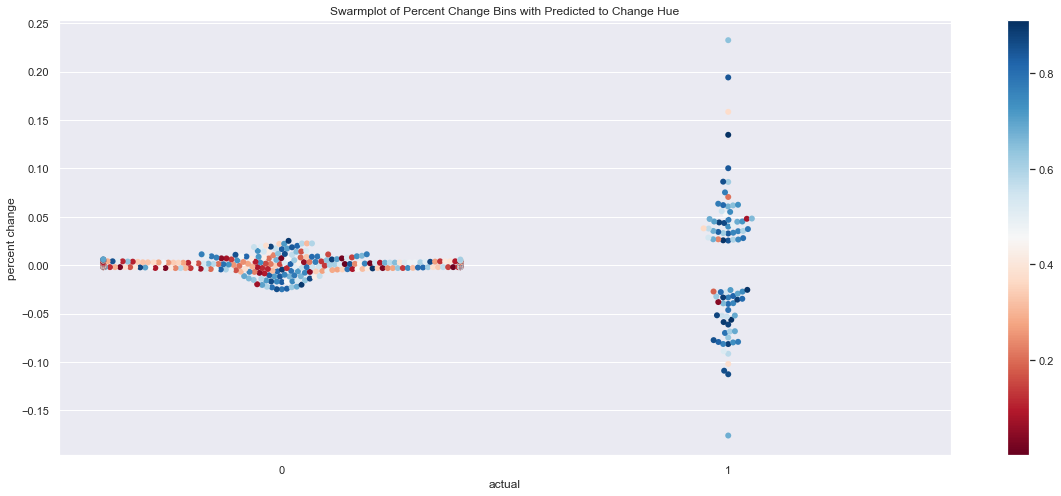
__Figure 25:__
> Swarm plot of percent change in change/no change bins. The color bar on the right shows the probability of predicting the positive class with blue being 100% probability of the stock changing and red being 0% probability of that stock changing. 

From the swarm plot in figure __25__, we can see from the color bar that stocks predicted to change (blue) are correctly classified as such, and that a lot of of the stocks not changing are in orange and red in the no change bin. What's interesting here is that the no change bin has values in the upper and lower percent change cutoffs that are incorrectly predcited to be change, but modifying the cuttoff value for the bining by lowering the threshold (from $+/-$ 2.5% down to $+/-$ 1.0% would allow for predictions to be accurately classified. 

From this exploration, the user who posts the tweets has greater influence on predictive powers than the choice of model. From the twitter feeds that were scraped, Richard Branson's had the most predictive power, and so the task becomes finding tweets that are similar in their feature distributions. This is a difficult task as the nuances as to how a person tweets and the topics they choose to post varies greatly between users. Facebook's CEO Mark Zuckerberg barely tweets at all, for example. So patterns matching Richard Branson's would need to be explored. 

Another consideration is to remove short tweets and to scrape data that only pertains to certain topics. This was done in early testing, in which tweets belonging to certain categories were removed (e.g. those pertaining to climate change, the election, and travel), but this truncated the already small amount of viable Twitter data and had mixed results. 

As this is only looking at stocks that the Twitter users' were either currently or formely CEOs of, it would be interesting to see if mentions of other stocks, such as the Cyberpunk Game by Elon Musk, could also be predicted.

***
## 8. Further Work and Future Implementation

The best model would correctly predict if a stock price were to drop, rise, or stay the same, so a multiclassification prediction would be the next immediate exploration. The change/no change was used for thie initial project mainly due to the visual differences discovered during EDA between stock changes, and as a means to assess if there was any predictive power at all from the user's posts.

- Apart from the three classifiers studied, random forest and stochastic gradient descent were also used, but ultimately not included in the final analysis as they perfomed poorer than the logistic regression in all test cases. However, some ensemble methods such as XGBoost haven't been tried, and using Deep Learning for text predictions has been shown to be effective in cases where other models fail.

- The vectorization methods applied could be tuned by examining various uni, bi, and ti-gram combinations, along with changing the minimum number of documents. Word embedding models are also something that should be tried as they could be able to capture more context associated with the words than simple term-document frequency methods. 

- BERT (Bidirectional Encoder Representations from Transformers) is a deep learning method that has been shown to be very effective for NLP predictions, and pre-trained models using a financial corpus would be a must to try on the twitter posts to analyze stock change prices.

Additionally, we are only looking at the executive's company stocks, and looking for stock changes from mentions of that user would be a better tool, as we could find influential twitter users that have predictive power over a variety of stocks.

***
## 9. Sources

[1] https://www.nytimes.com/2018/08/07/business/tesla-stock-elon-musk-private.html  
[2] https://www.cnbc.com/2020/05/01/tesla-ceo-elon-musk-says-stock-price-is-too-high-shares-fall.html  
[3]https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7#:~:text=Phik%20(%F0%9D%9C%99k)%20is%20a%20new,a%20bivariate%20normal%20input%20distribution.